# **TFG**  

***USE OF ML AND SNOMED CT ENCODED HEALTH PROBLEMS TO PREDICT HOSPITAL DISCHARGE DIAGNOSES***  

Cindy Chen

Universitat de Barcelona

2024-2025


In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 

%matplotlib inline

## **Data importation**

In [2]:
# Load administration file
administration_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/administration_df.csv')
administration_df

,nhc,episode_ref,treatment_ref,adm_event_date,adm_route_ref,adm_route_descr,adm_prn,given,no_administration_reason_ref,adm_drug_ref,drug_descr,adm_atc_ref,atc_descr,adm_drug_enum,adm_drug_dose,adm_drug_dose_planing,adm_drug_unit,adm_load_date,care_level_ref
0,101578,558513,1146612,2024-02-06 20:48:00,350,PERFUSION INTRAVENOSA,0,0,0,E56DE74AEBF98B59E1000000AC10014C,"GLUCOSA 10%, VIAL 500 ML",B05BA91,Suero glucosado,0,500.0,500.0,ML,2024-10-26 10:47:29,21866480
1,101578,558513,1146612,2024-02-06 20:48:00,350,PERFUSION INTRAVENOSA,0,0,0,676E5C461C27EF6FE1000000AC100155,"GLUCOSA 10%, VIAL 500 ML",B05BA03,Carbohidratos,3,500.0,500.0,ML,2024-10-26 10:47:29,21866480
2,101578,558513,1146612,2024-02-07 01:00:00,350,PERFUSION INTRAVENOSA,0,0,0,E56DE74AEBF98B59E1000000AC10014C,"GLUCOSA 10%, VIAL 500 ML",B05BA91,Suero glucosado,0,500.0,500.0,ML,2024-10-26 10:47:29,21866480
3,101578,558513,1146612,2024-02-07 01:00:00,350,PERFUSION INTRAVENOSA,0,0,0,676E5C461C27EF6FE1000000AC100155,"GLUCOSA 10%, VIAL 500 ML",B05BA03,Carbohidratos,3,500.0,500.0,ML,2024-10-26 10:47:29,21866480
4,101578,558513,1146612,2024-02-07 08:20:58,350,PERFUSION INTRAVENOSA,0,1,9,E56DE74AEBF98B59E1000000AC10014C,"GLUCOSA 10%, VIAL 500 ML",B05BA91,Suero glucosado,0,500.0,NaN,ML,2024-10-26 10:47:29,21866480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451520,9885,607221,1189193,2024-02-16 09:00:00,100,ORAL,0,0,0,AB6D5C461C27EF6FE1000000AC100155,"ESPIRONOLACTONA, 100 MG COMP",C03DA01,Espironolactona,0,0.5,0.5,UND,2024-10-26 10:47:29,21967287
451521,9885,607221,1189193,2024-02-17 09:00:00,100,ORAL,0,0,0,AB6D5C461C27EF6FE1000000AC100155,"ESPIRONOLACTONA, 100 MG COMP",C03DA01,Espironolactona,0,0.5,0.5,UND,2024-10-26 10:47:29,21967287
451522,9885,607221,1189193,2024-02-18 09:00:00,100,ORAL,0,0,0,AB6D5C461C27EF6FE1000000AC100155,"ESPIRONOLACTONA, 100 MG COMP",C03DA01,Espironolactona,0,0.5,0.5,UND,2024-10-26 10:47:29,21967287
451523,9885,607221,1189193,2024-02-19 09:00:00,100,ORAL,0,0,0,AB6D5C461C27EF6FE1000000AC100155,"ESPIRONOLACTONA, 100 MG COMP",C03DA01,Espironolactona,0,0.5,0.5,UND,2024-10-26 10:47:29,21967287


In [3]:
# Load admission discharge file
admission_discharge_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/admission_discharge_df.csv')
admission_discharge_df

,nhc,episode_ref,mot_ref,mot_ref_descr,type_mot,admission_discharge_load_date
0,100032,210865,320012,Orden Facultativo,START,2024-10-20 13:41:17
1,100032,210865,320001,Destino Domicilio,END,2024-10-20 13:41:54
2,100032,706875,320012,Orden Facultativo,START,2024-10-20 13:41:17
3,100032,706875,320001,Destino Domicilio,END,2024-10-20 13:41:54
4,100032,1501103,320012,Orden Facultativo,START,2024-10-20 13:41:17
...,...,...,...,...,...,...
22525,9885,147485,320001,Destino Domicilio,END,2024-10-20 13:41:54
22526,9885,607221,320001,Destino Domicilio,END,2024-10-20 13:41:54
22527,9885,607221,320012,Orden Facultativo,START,2024-10-20 13:41:17
22528,9885,1230503,320012,Orden Facultativo,START,2024-10-20 13:41:17


In [4]:
# Load care level file
care_level_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/care_level_df.csv')
care_level_df

,nhc,episode_ref,care_level_ref,care_level_start_date,care_level_end_date,care_level_load_date,care_level_type_ref
0,100032,210865,22649948,2024-04-03 09:26:00,2024-04-03 13:42:48,2024-10-20 12:57:35,PEND. CLAS
1,100032,706875,22051594,2024-02-20 10:33:00,2024-02-20 13:58:40,2024-10-20 12:57:35,PEND. CLAS
2,100032,1501103,20238333,2023-10-03 10:23:00,2023-10-03 14:32:43,2024-10-20 12:57:35,PEND. CLAS
3,100424,3358256,17991800,2022-10-26 14:29:06,2022-10-26 21:18:07,2024-11-04 22:37:20,EM
4,101254,3390092,17624298,2022-09-02 14:38:37,2022-09-02 21:54:31,2024-11-04 22:37:20,PEND. CLAS
...,...,...,...,...,...,...,...
49193,9885,594249,21945545,2024-02-08 16:38:10,2024-02-09 20:56:10,2024-10-20 12:57:35,EM
49194,9885,607221,21967287,2024-02-13 12:15:16,2024-02-28 15:45:00,2024-10-20 12:57:35,WARD
49195,9885,607221,21968690,2024-02-11 23:34:28,2024-02-13 12:15:16,2024-10-20 12:57:35,ICU
49196,9885,607221,21968926,2024-02-09 21:04:15,2024-02-11 23:34:28,2024-10-20 12:57:35,WARD


In [5]:
# Load clinical records file
clinical_records_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/clinical_records_df.csv')
clinical_records_df

,nhc,episode_ref,clinical_records_result_date,meas_type_ref,clinical_records_load_date,ou_loc_ref,ou_med_ref,rc_sap_ref,clinical_records_result_num,clinical_records_result_txt,clinical_records_units,clinical_records_descr,care_level_ref,clinical_records_result
0,101578,558513,2024-02-06 13:31:00,1,2024-10-20 17:58:05,NaN,NaN,PRESN_DIA,74.0,NaN,mm Hg,Presión arterial no invasiva diastólica,21866480,74.0
1,101578,558513,2024-02-06 13:31:00,1,2024-10-20 17:58:05,NaN,NaN,FR_IP,12.0,NaN,resp/min,Frecuencia respiratoria por impedancia,21866480,12.0
2,101578,558513,2024-02-06 13:31:00,1,2024-10-20 17:58:05,NaN,NaN,FC_OSC,103.0,NaN,lpm,Frecuencia cardíaca por oscilometría,21866480,103.0
3,101578,558513,2024-02-06 13:31:00,1,2024-10-20 17:58:05,NaN,NaN,FREC_RESP,12.0,NaN,resp/min,Frecuencia respiratoria por inspección,21866480,12.0
4,101578,558513,2024-02-06 13:31:00,1,2024-10-20 17:58:05,NaN,NaN,TEMP_CT,36.5,NaN,°C,Temperatura cutánea,21866480,36.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035317,9885,594249,2024-02-08 22:00:00,0,2024-10-21 16:19:04,PUR2,URM,CUERPO_CETONICO,NaN,CUERPO_CETONICO_,Descripción,Cuerpos cetónicos en tira reactiva,21945545,CUERPO_CETONICO_
3035318,9885,594249,2024-02-08 22:00:00,0,2024-10-21 16:19:04,PUR2,URM,LEUCOCITURIA,NaN,LEUCOCITURIA_4,Descripción,Leucocituria en tira reactiva,21945545,LEUCOCITURIA_4
3035319,9885,594249,2024-02-08 22:00:00,0,2024-10-21 16:19:04,PUR2,URM,NITRITO_ORINA,NaN,NITRITO_ORINAQ_1,Descripción,Nitritos en tira reactiva,21945545,NITRITO_ORINAQ_1
3035320,9885,594249,2024-02-08 22:00:00,0,2024-10-21 16:19:04,PUR2,URM,UROBILINO_ORINA,NaN,UROBILINO_ORINA_,Descripción,Urobilinógeno en tira reactiva,21945545,UROBILINO_ORINA_


In [6]:
# Load demographic file
demographic_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/demographic_df.csv')
demographic_df

,nhc,birth_date,sex_atr,natio_ref,nation_descr,demographic_load_date
0,100032,1955-06-18,2,ES,España,2024-10-20 11:50:51
1,100424,1962-12-05,2,ES,España,2024-10-25 19:03:32
2,101254,1956-06-11,2,ES,España,2024-10-20 11:50:51
3,101347,1988-07-03,2,ES,España,2024-10-20 11:50:51
4,10141,1956-10-20,2,ES,España,2024-10-20 11:50:51
...,...,...,...,...,...,...
20284,98787,1946-07-04,2,ES,España,2024-10-20 11:50:51
20285,9885,1955-12-28,2,ES,España,2024-10-20 11:50:51
20286,99191,1962-12-10,2,ES,España,2024-11-04 22:23:45
20287,99419,1968-06-24,1,ES,España,2024-10-20 11:50:51


In [7]:
# Load diagnostic file
diagnostic_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/diagnostic_df.csv')
diagnostic_df

,nhc,episode_ref,reg_date,diag_ref,catalog,icd10_code,icd10_descr,class_ref,poa_ref,diagnostic_load_date
0,100032,210865,2024-03-27 13:45:11,17136,12,C44.92,"Carcinoma de células escamosas de piel, locali...",H,0,2024-10-20 14:35:10
1,100032,210865,2024-04-03 10:00:00,17136,12,C44.92,"Carcinoma de células escamosas de piel, locali...",H,0,2024-10-20 14:35:10
2,100032,210865,2024-04-03 09:26:00,23995,12,L82.1,Otros tipos de queratosis seborreica,S,1,2024-10-20 14:35:10
3,100032,210865,2024-04-03 09:26:00,12789,12,L57.0,Queratosis actinica,S,1,2024-10-20 14:35:10
4,100032,210865,2024-04-03 09:26:00,1604,12,C44.321,Carcinoma de células escamosas de piel de nariz,P,1,2024-10-20 14:35:10
...,...,...,...,...,...,...,...,...,...,...
318481,99419,2010780,2024-06-17 13:10:16,13545,12,E24.9,"Sindrome de cushing, no especificado",A,0,2024-10-20 14:35:10
318482,99419,2010780,2024-05-30 18:34:12,13545,12,E24.9,"Sindrome de cushing, no especificado",A,0,2024-10-20 14:35:10
318483,99419,2010780,2024-07-05 13:18:27,14619,12,F60.9,"Trastorno de la personalidad, no especificado",A,0,2024-10-20 14:35:10
318484,99419,2010780,2024-07-08 13:18:18,14619,12,F60.9,"Trastorno de la personalidad, no especificado",A,0,2024-10-20 14:35:10


In [8]:
# Load Diagnosis Related Group (DRG) file
drg_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/drg_df.csv')
drg_df

,nhc,episode_ref,drg_weight,drg_ref,soi_ref,soi_descr,rom_ref,rom_descr,mdc_ref,drg_load_date
0,100032,210865,0.7030,364,1,Minor,1,Minor,9,2024-10-20 15:17:25
1,100032,706875,0.9075,73,1,Minor,1,Minor,2,2024-10-20 15:17:25
2,100032,1501103,0.4340,385,1,Minor,1,Minor,9,2024-10-20 15:17:25
3,101578,558513,0.7316,240,1,Minor,1,Minor,6,2024-10-20 15:17:25
4,101886,722211,1.0182,310,1,Minor,1,Minor,8,2024-10-20 15:17:25
...,...,...,...,...,...,...,...,...,...,...
10330,9885,551,1.0151,143,3,Major,2,Moderate,4,2024-10-20 15:17:25
10331,9885,82784,0.6468,283,2,Moderate,1,Minor,7,2024-10-20 15:17:25
10332,9885,147485,0.8626,281,2,Moderate,2,Moderate,7,2024-10-20 15:17:25
10333,9885,607221,0.8946,283,3,Major,4,Extreme,7,2024-10-20 15:17:25


In [9]:
# Load encounter file
encounter_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/encounter_df.csv')
encounter_df

,nhc,episode_ref,encounter_date,encounter_load_date,ou_med_ref,ou_loc_ref,out_type_ref
0,100032,210865,2024-04-03 10:00:00,2024-10-20 13:18:11,DER,BQUIR,IQ
1,100032,210865,2024-04-03 11:36:46,2024-10-20 13:16:21,DER,RBP11,VI
2,100032,706875,2024-02-20 11:00:00,2024-10-20 13:18:11,DER,BQUIR,IQ
3,100032,706875,2024-02-20 10:54:09,2024-10-20 13:16:21,DER,RBP11,VI
4,100032,1501103,2023-10-03 10:24:00,2024-10-20 13:18:11,DER,BQUIR,IQ
...,...,...,...,...,...,...,...
216341,9885,607221,2024-02-26 15:05:00,2024-10-20 13:18:11,RADIO,RAD,PR
216342,99191,3192157,2022-11-22 03:31:51,2024-11-04 22:42:19,RADIO,MMGSC,PP
216343,99191,3192157,2022-11-28 19:36:00,2024-11-04 22:39:20,RADIO,MMGSC,PR
216344,99419,2010780,2023-07-19 14:35:57,2024-10-20 13:22:45,PSI,PSICE,PP


In [10]:
# Load episode file
episode_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/episode_df.csv')
episode_df

,nhc,episode_ref,type_ref,episode_start_date,episode_end_date,episode_load_date
0,100032,210865,HOSP_IQ,2024-04-03 09:26:00,2024-04-03 13:42:48,2024-10-20 12:54:04
1,100032,706875,HOSP_IQ,2024-02-20 10:33:00,2024-02-20 13:58:40,2024-10-20 12:54:04
2,100032,1501103,HOSP_IQ,2023-10-03 10:23:00,2023-10-03 14:32:43,2024-10-20 12:54:04
3,100032,1581317,AM,2023-10-18 16:04:22,2023-10-18 16:04:22,2024-10-20 12:54:04
4,100424,2794240,AM,2023-02-22 11:14:50,2024-05-24 13:00:00,2024-10-25 19:49:51
...,...,...,...,...,...,...
95417,9885,1230503,HOSP,2024-01-10 08:15:00,2024-01-11 08:15:00,2024-10-20 12:54:04
95418,9885,1238025,AM,2024-01-10 13:22:49,2024-03-30 09:20:00,2024-10-20 12:54:04
95419,99191,3192157,AM,2022-11-22 03:31:51,2022-11-28 19:36:00,2024-11-04 22:35:42
95420,99419,2010780,AM,2023-07-19 14:35:57,2024-07-22 12:30:00,2024-10-20 12:54:04


In [11]:
# Load exitus file
exitus_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/exitus_df.csv')
exitus_df

,nhc,exitus_date,exitus_load_date
0,70551379,2024-06-13,2024-10-20 11:53:24
1,5298028,2024-07-05,2024-10-20 11:53:24
2,5676321,2024-04-15,2024-10-20 11:53:24
3,517477,2024-05-28,2024-10-20 11:53:24
4,4635652,2024-05-07,2024-10-20 11:53:24
...,...,...,...
345,70275895,2024-05-21,2024-11-04 22:24:14
346,70593531,2024-06-19,2024-11-04 22:24:14
347,70557227,2024-05-26,2024-11-04 22:24:14
348,4685197,2024-05-04,2024-11-04 22:24:14


In [12]:
# Load health issues file
health_issues_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/health_issues_df.csv')
health_issues_df

,nhc,snomed_code,snomed_descr,ou_med_ref,health_issue_start_date,health_issue_end_date,motive,health_issue_load_date
0,70603915,211333001,"""abrasiÓn",UCOT,2024-05-24,NaN,3,2024-10-20 15:21:14
1,70554835,191895007,"""abuso de cannabis sin adicciÓn",PSI,2024-04-16,NaN,1,2024-10-20 15:21:14
2,4416375,424993006,"""adenocarcinoma de pulmÓn",ONC,2024-03-11,NaN,1,2024-10-20 15:21:14
3,70122561,424993006,"""adenocarcinoma de pulmÓn",ONC,2024-05-08,NaN,1,2024-10-20 15:21:14
4,5671311,424993006,"""adenocarcinoma de pulmÓn",ONC,2024-02-29,NaN,1,2024-10-20 15:21:14
...,...,...,...,...,...,...,...,...
11379,4128798,53277000,vulvovaginitis,GIN,2024-05-06,NaN,0,2024-10-20 15:21:14
11380,4116250,53277000,vulvovaginitis,GIN,2024-05-31,NaN,3,2024-10-20 15:21:14
11381,748188,53277000,vulvovaginitis,GIN,2024-06-07,NaN,0,2024-10-20 15:21:14
11382,4434722,53277000,vulvovaginitis,GIN,2024-05-03,NaN,1,2024-10-20 15:21:14


In [13]:
# Load laboratory file
laboratory_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/laboratory_df.csv')
laboratory_df

,nhc,episode_ref,lab_extract_date,lab_result_date,lab_load_date,ou_med_ref,care_level_ref,lab_sap_ref,lab_result_num,lab_result_txt,lab_units,lab_descr,lab_group_ref,lab_result
0,101578,546445,2024-02-05 10:05:34,2024-02-05 10:24:48,2024-10-20 19:15:17,URM,21888885,LAB2728,5.0,NaN,N.D.,pH en perfil bàsic orina,101961,5.0
1,101578,546445,2024-02-05 10:05:34,2024-02-05 10:24:48,2024-10-20 19:15:17,URM,21888885,LAB2729,NaN,Negatiu,N.D.,Glucosa perfil bàsic orina,101962,Negatiu
2,101578,546445,2024-02-05 10:05:34,2024-02-05 10:24:48,2024-10-20 19:15:17,URM,21888885,LAB2730,NaN,Traces,N.D.,"Cetona, PBO",101030,Traces
3,101578,546445,2024-02-05 10:05:34,2024-02-05 10:24:48,2024-10-20 19:15:17,URM,21888885,LAB2731,NaN,Negatiu,N.D.,"Bilirrubina, PBO",100846,Negatiu
4,101578,546445,2024-02-05 10:05:34,2024-02-05 10:24:48,2024-10-20 19:15:17,URM,21888885,LAB2732,NaN,Traces,N.D.,Urobilinogen perfil bàsic dor,101963,Traces
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876202,9885,607221,2024-02-23 14:05:32,2024-02-23 14:05:11,2024-10-20 19:15:17,UTH,21967287,LAB2832,24.0,NaN,N.D.,Sodi orina 24 hores,101966,24.0
1876203,9885,607221,2024-02-23 14:05:32,2024-02-23 14:05:11,2024-10-20 19:15:17,UTH,21967287,LAB2833,22.4,NaN,mEq/L,Potasio orina 24h,100161,22.4
1876204,9885,607221,2024-02-23 14:05:32,2024-02-23 14:05:11,2024-10-20 19:15:17,UTH,21967287,LAB2999,12.0,NaN,N.D.,Temps de diuresi,101974,12.0
1876205,9885,607221,2024-02-23 14:05:32,2024-02-23 14:05:11,2024-10-20 19:15:17,UTH,21967287,LABDIURV,1200.0,NaN,mL,"Diuresis, orina 24 h",101313,1200.0


In [14]:
# Load movement file
movement_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/movement_df.csv')
movement_df

,nhc,episode_ref,mov_start_date,mov_end_date,place_ref,ou_med_ref,ou_med_descr,ou_loc_ref,ou_loc_descr,care_level_type_ref,facility_descr,mov_load_date,care_level_ref
0,100032,210865,2024-04-03 09:26:00,2024-04-03 13:42:48,NaN,DER,DERMATOLOGIA\n,CMPLT,Sala CMA Platé,PEND. CLAS,Sin definir,2024-10-20 13:22:45,22649948
1,100032,210865,2024-04-03 13:42:48,2024-04-03 13:42:48,NaN,DER,DERMATOLOGIA\n,CMPLT,Sala CMA Platé,PEND. CLAS,Sin definir,2024-10-20 13:22:45,22649948
2,100032,706875,2024-02-20 10:33:00,2024-02-20 13:58:40,NaN,DER,DERMATOLOGIA\n,CMPLT,Sala CMA Platé,PEND. CLAS,Sin definir,2024-10-20 13:22:45,22051594
3,100032,706875,2024-02-20 13:58:40,2024-02-20 13:58:40,NaN,DER,DERMATOLOGIA\n,CMPLT,Sala CMA Platé,PEND. CLAS,Sin definir,2024-10-20 13:22:45,22051594
4,100032,1501103,2023-10-03 10:23:00,2023-10-03 14:32:43,NaN,DER,DERMATOLOGIA\n,CMPLT,Sala CMA Platé,PEND. CLAS,Sin definir,2024-10-20 13:22:45,20238333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112484,9885,607221,2024-02-28 15:45:00,2024-02-28 15:45:00,2.147484e+09,UTH,UNITAT DE TRANSPLANT. HEPÁTIC\n,G093,G093 SALA G DE CIR. HEPÃTICA Y TRASP.,WARD,VILLARROEL,2024-10-20 13:16:21,21967287
112485,9885,607221,2024-02-11 23:34:28,2024-02-13 12:15:16,2.147484e+09,UTH,UNITAT DE TRANSPLANT. HEPÁTIC\n,E073,E073 SALA E CUIDADOS INTERMEDIOS,ICU,VILLARROEL,2024-10-20 13:16:21,21968690
112486,9885,607221,2024-02-09 21:04:15,2024-02-11 23:34:28,2.147484e+09,UTH,UNITAT DE TRANSPLANT. HEPÁTIC\n,G093,G093 SALA G DE CIR. HEPÃTICA Y TRASP.,WARD,VILLARROEL,2024-10-20 13:16:21,21968926
112487,9885,1230503,2024-01-10 08:15:00,2024-01-11 08:15:00,2.147484e+09,GAS,GASTROENTEROLOGIA\n,C074,C074 SALA CORTA ESTANCIA GASTROENTEROLOGÍA,SHORT,VILLARROEL,2024-10-20 13:16:21,21467580


In [15]:
# Load perfusion file
perfusion_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/perfusion_df.csv')
perfusion_df

,nhc,episode_ref,treatment_ref,infusion_rate,rate_change_counter,perfusion_start_date,perfusion_end_date,perfusion_load_date,care_level_ref
0,5448128,909,2907,62,1,2024-04-10 02:06:00,2024-04-10 09:00:00,2024-10-26 10:47:29,1312
1,5448128,909,2907,62,2,2024-04-10 09:00:00,2024-04-10 13:50:00,2024-10-26 10:47:29,1312
2,5448128,909,2906,62,1,2024-04-10 02:07:00,2024-04-10 09:00:00,2024-10-26 10:47:29,1312
3,5448128,909,2906,62,2,2024-04-10 09:00:00,2024-04-10 15:25:44,2024-10-26 10:47:29,1312
4,5687816,729,3810,62,1,2024-04-03 23:42:00,2024-04-04 01:00:00,2024-10-26 10:47:29,3708
...,...,...,...,...,...,...,...,...,...
30849,4783010,3517641,2462011,3,3,2018-06-08 10:21:00,2018-06-08 11:42:00,2024-11-05 06:55:14,2044029
30850,4783010,3517641,2462011,2,4,2018-06-08 11:42:00,2018-06-08 12:20:00,2024-11-05 06:55:14,2044029
30851,4783010,3517641,2462011,1,5,2018-06-08 12:20:00,2018-06-08 18:32:00,2024-11-05 06:55:14,2044029
30852,70745582,3520758,2604211,20,1,2022-01-24 22:20:30,2022-01-25 13:22:30,2024-11-05 06:55:14,15939554


In [16]:
# Load prescription file
prescription_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/prescription_df.csv')
prescription_df

,nhc,episode_ref,treatment_ref,prescription_prn,freq_ref,phform_ref,phform_descr,prescr_env_ref,adm_route_ref,prescription_adm_route_descr,...,ou_med_ref,start_drug_date,end_drug_date,prescription_load_date,prescription_drug_ref,prescription_drug_descr,prescription_drug_enum,prescription_drug_dose,prescription_drug_unit,care_level_ref
0,101578,546445,1121819,0,C/24H,167,COMPRIMIDO DISPERSABLES,9,100,ORAL,...,URM,2024-02-05 10:49:01,2024-04-24 22:00:00,2024-10-26 10:47:29,D0749F5547FC5261E1000000AC10015A,MIRTAZAPINA,0,1.0,COM,21887396
1,101578,546445,1121820,0,C/24H,100,COMPRIMIDO,9,100,ORAL,...,URM,2024-02-05 10:49:01,2024-07-23 22:00:00,2024-10-26 10:47:29,1A11A1555203652DE1000000AC10015A,ESPIRONOLACTONA,0,1.0,UND,21887396
2,101578,546445,1121821,0,C/MES,199,SOLUCION ORAL,9,100,ORAL,...,URM,2024-02-05 10:49:01,2024-08-16 22:00:00,2024-10-26 10:47:29,583C9F5A29E75943E1000000AC16013F,colecalciferol,0,1.0,UND,21887396
3,101578,546445,1121822,0,C/24H,110,CAPSULA,9,100,ORAL,...,URM,2024-02-05 10:49:01,2024-08-16 22:00:00,2024-10-26 10:47:29,C75B9F5547FC5261E1000000AC10015A,OMEPRAZOL,0,1.0,UND,21887396
4,101578,546445,1121825,0,C/8H,100,COMPRIMIDO,9,100,ORAL,...,URM,2024-02-05 10:49:15,2024-02-15 00:00:00,2024-10-26 10:47:29,997D9F5547FC5261E1000000AC10015A,PARACETAMOL,0,1.0,UND,21887396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104622,9885,607221,1189189,0,C/24H,212,INYECTABLE,4,140,SUBCUTANEA,...,UTH,2024-02-28 15:04:33,2024-03-29 00:00:00,2024-10-26 10:47:29,EFBBA2559161E937E1000000AC10015A,TINZAPARINA,0,0.0,ML,21967287
104623,9885,607221,1189190,0,DE-0-0,199,SOLUCION ORAL,4,100,ORAL,...,UTH,2024-02-28 15:06:10,2024-03-29 00:00:00,2024-10-26 10:47:29,EACBA35551047E7DE1000000AC10015A,HIDROXIDO DE MAGNESIO,0,1.0,SOB,21967287
104624,9885,607221,1189191,0,DE-0-CE,100,COMPRIMIDO,4,100,ORAL,...,UTH,2024-02-28 15:08:27,2024-03-29 00:00:00,2024-10-26 10:47:29,BEFC015D58D005F6E1000000AC16019D,propranolol,0,2.0,COM,21967287
104625,9885,607221,1189192,0,0-0-CE,110,CAPSULA,4,100,ORAL,...,UTH,2024-02-28 15:09:28,2024-03-29 00:00:00,2024-10-26 10:47:29,CE51A3554908A548E1000000AC10015A,CLOMETIAZOL,0,1.0,UND,21967287


In [17]:
# List of all dataframes
dataframes = {
    'administration_df': administration_df,
    'admission_discharge_df': admission_discharge_df,
    'care_level_df': care_level_df,
    'clinical_records_df': clinical_records_df,
    'demographic_df': demographic_df,
    'diagnostic_df': diagnostic_df,
    'drg_df': drg_df,
    'encounter_df': encounter_df,
    'episode_df': episode_df,
    'exitus_df': exitus_df,
    'health_issues_df': health_issues_df,
    'laboratory_df': laboratory_df,
    'movement_df': movement_df,
    'perfusion_df': perfusion_df,
    'prescription_df': prescription_df,
}

## **Check & remove duplicates**

In [18]:
# Check for duplicates and remove them
for name, df in dataframes.items():
    duplicate_count = df.duplicated().sum()

    # Remove duplicates if any exist
    if duplicate_count > 0:
        dataframes[name] = df.drop_duplicates()

## **Check for missing values**

In [19]:
# Check for missing values (in percentage) in each dataframe
for name, df in dataframes.items():
    total_rows = len(df)
    missing_percent = (df.isnull().sum() / total_rows) * 100
    missing_cols = missing_percent[missing_percent > 0]

    if not missing_cols.empty:
        percent_missing_cols = (len(missing_cols) / df.shape[1]) * 100
        print(f'\n{name} has missing values in {percent_missing_cols:.2f}% of its columns:')

        # Convert missing percentage values to a pandas DataFrame for better formatting
        missing_table = missing_cols.to_frame('Missing Percentage')
        missing_table = missing_table.round(2)  # Round to two decimal places for clarity

        # Display the table nicely in a Jupyter notebook or IPython environment
        display(missing_table)
    else:
        print(f'{name} has no missing values.')


administration_df has missing values in 5.26% of its columns:


,Missing Percentage
adm_drug_dose_planing,30.27


admission_discharge_df has no missing values.
care_level_df has no missing values.

clinical_records_df has missing values in 28.57% of its columns:


,Missing Percentage
ou_loc_ref,50.33
ou_med_ref,50.33
clinical_records_result_num,25.77
clinical_records_result_txt,74.23


demographic_df has no missing values.
diagnostic_df has no missing values.
drg_df has no missing values.
encounter_df has no missing values.
episode_df has no missing values.
exitus_df has no missing values.

health_issues_df has missing values in 12.50% of its columns:


,Missing Percentage
health_issue_end_date,82.3



laboratory_df has missing values in 14.29% of its columns:


,Missing Percentage
lab_result_num,6.82
lab_result_txt,93.18



movement_df has missing values in 7.69% of its columns:


,Missing Percentage
place_ref,44.55


perfusion_df has no missing values.
prescription_df has no missing values.


In [20]:
# Check for missing values in each dataframe
for name, df in dataframes.items():
    missing_count = df.isnull().sum()
    missing_cols = missing_count[missing_count > 0]

    if not missing_cols.empty:
        print(f'\n{name} has missing values:')
        # Display as a nicely formatted pandas DataFrame
        missing_table = missing_cols.to_frame('Missing Count')
        display(missing_table.sort_values('Missing Count', ascending=False))
    else:
        print(f'{name} has no missing values.')


administration_df has missing values:


,Missing Count
adm_drug_dose_planing,136689


admission_discharge_df has no missing values.
care_level_df has no missing values.

clinical_records_df has missing values:


,Missing Count
clinical_records_result_txt,2252968
ou_loc_ref,1527721
ou_med_ref,1527721
clinical_records_result_num,782354


demographic_df has no missing values.
diagnostic_df has no missing values.
drg_df has no missing values.
encounter_df has no missing values.
episode_df has no missing values.
exitus_df has no missing values.

health_issues_df has missing values:


,Missing Count
health_issue_end_date,9369



laboratory_df has missing values:


,Missing Count
lab_result_txt,1748341
lab_result_num,127866



movement_df has missing values:


,Missing Count
place_ref,50119


perfusion_df has no missing values.
prescription_df has no missing values.


## **Handling missing values**

In [ ]:
#### select more columns 

In [21]:
# Select relevant columns from administration_df
administration = administration_df[
    ['nhc', 'episode_ref',
    'adm_route_descr', 'adm_drug_ref', 'adm_drug_dose', 'adm_drug_unit', 'adm_atc_ref']]

In [22]:
# Get the counts of each value in the 'adm_drug_ref' column
value_counts_adm = administration['adm_drug_ref'].value_counts()

# Get the values with the minimum count
least_frequent_values_adm = value_counts_adm[value_counts_adm<2000].index.tolist()

print(len(least_frequent_values_adm))

1249


In [23]:
# Remove rows where 'adm_drug_ref' is one of the least frequent values
administration = administration[~administration['adm_drug_ref'].isin(least_frequent_values_adm)]

In [24]:
# Calculate the mean of 'adm_drug_dose' grouped by episode and adm_drug_ref
administration['adm_drug_dose_mean'] = administration.groupby(
    ['episode_ref', 'adm_drug_ref'])['adm_drug_dose'].transform('mean')

In [25]:
# Select relevant columns from administration
administration = administration[
    ['nhc', 'episode_ref',
    'adm_route_descr', 'adm_drug_ref', 'adm_drug_dose_mean', 'adm_drug_unit', 'adm_atc_ref']]

In [26]:
# Remove duplicates & missing values
administration = administration.drop_duplicates()
administration = administration.dropna()

In [27]:
# Save dataframe
administration.to_csv('administration.csv', index=False)

In [28]:
# Ensure the date columns are datetime type
care_level_df['care_level_start_date'] = pd.to_datetime(care_level_df['care_level_start_date'])
care_level_df['care_level_end_date'] = pd.to_datetime(care_level_df['care_level_end_date'])

# Calculate duration in days
care_level_df['care_level_duration'] = (care_level_df['care_level_end_date'] - care_level_df['care_level_start_date'])

# Select relevant columns from care_level_df
care_level = care_level_df[
    ['nhc', 'episode_ref', 'care_level_duration']]

In [29]:
# Remove duplicates & missing values
care_level = care_level.drop_duplicates()
care_level = care_level.dropna()

In [30]:
# Save dataframe
care_level.to_csv('care_level.csv', index=False)

In [31]:
# Select relevant columns from clinical_records_df
clinical_records = clinical_records_df[
    ['nhc', 'episode_ref', 'rc_sap_ref',
    'clinical_records_result_num', 'clinical_records_units']]

In [32]:
# Get the counts of each value in the 'rc_sap_ref' column
value_counts_cr = clinical_records['rc_sap_ref'].value_counts()

# Get the values with the minimum count
least_frequent_values_cr = value_counts_cr[value_counts_cr<200500].index.tolist()

# Remove rows where 'rc_sap_ref' is one of the least frequent values
clinical_records = clinical_records[~clinical_records['rc_sap_ref'].isin(least_frequent_values_cr)]

In [33]:
# Calculate the mean of 'clinical_records_result_num' grouped by episode and rc_sap_ref
clinical_records['clinical_records_result_num_mean'] = clinical_records.groupby(
    ['episode_ref', 'rc_sap_ref'])['clinical_records_result_num'].transform('mean')

In [34]:
# Select relevant columns from clinical_records
clinical_records = clinical_records[
    ['nhc', 'episode_ref', 'rc_sap_ref',
    'clinical_records_result_num_mean', 'clinical_records_units']]

In [35]:
# Remove duplicates & missing values
clinical_records = clinical_records.drop_duplicates()
clinical_records = clinical_records.dropna()

In [36]:
# Save dataframe
clinical_records.to_csv('clinical_records.csv', index=False)

In [37]:
# Convert 'birth_date' column to datetime format and calculate age
demographic_df['birth_date'] = pd.to_datetime(demographic_df['birth_date'])
ref_date = pd.to_datetime('2024-11-28')
demographic_df['age'] = (ref_date - demographic_df['birth_date']).dt.days // 365

# Define age bins and labels
bins = [0, 18, 35, 50, 65, 80, 100, 125]
labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '81-100', '101+']
# Create a new column for age groups
demographic_df['age_group'] = pd.cut(demographic_df['age'], bins=bins, labels=labels, right=False)

# Select relevant columns from demographic_df
demographic = demographic_df[
    ['nhc', 'sex_atr', 'age', 'age_group']]

In [38]:
# Remove duplicates & missing values
demographic = demographic.drop_duplicates()
demographic = demographic.dropna()

In [39]:
# Save dataframe
demographic.to_csv('demographic.csv', index=False)

In [40]:
# Diagnosis not present on admission
diagnostic_df = diagnostic_df[diagnostic_df["poa_ref"] == 0]

# Diccionario con los rangos y capítulos ICD-10
icd10_rangos = {
    ('A00', 'B99'): 'CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS',
    ('C00', 'D49'): 'TUMORES (NEOPLASIAS)',
    ('D50', 'D89'): 'ENFERMEDADES DE LA SANGRE Y ÓRGANOS HEMATOPOYÉTICOS Y TRASTORNOS QUE AFECTAN AL MECANISMO INMUNOLÓGICO',
    ('E00', 'E89'): 'ENFERMEDADES ENDOCRINAS, NUTRICIONALES Y METABÓLICAS',
    ('F01', 'F99'): 'TRASTORNOS MENTALES Y DE COMPORTAMIENTO',
    ('G00', 'G99'): 'ENFERMEDADES DEL SISTEMA NERVIOSO',
    ('H00', 'H59'): 'ENFERMEDADES DEL OJO Y SUS ANEXOS',
    ('H60', 'H95'): 'ENFERMEDADES DEL OÍDO Y DE LA APÓFISIS MASTOIDES',
    ('I00', 'I99'): 'ENFERMEDADES DEL SISTEMA CIRCULATORIO',
    ('J00', 'J99'): 'ENFERMEDADES DEL SISTEMA RESPIRATORIO',
    ('K00', 'K95'): 'ENFERMEDADES DEL SISTEMA DIGESTIVO',
    ('L00', 'L99'): 'ENFERMEDADES DE LA PIEL Y DEL TEJIDO SUBCUTÁNEO',
    ('M00', 'M99'): 'ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y DEL TEJIDO CONECTIVO',
    ('N00', 'N99'): 'ENFERMEDADES DEL SISTEMA GENITOURINARIO',
    ('O00', 'O99'): 'EMBARAZO, PARTO Y PUERPERIO',
    ('P00', 'P96'): 'CIERTAS AFECCIONES ORIGINADAS EN EL PERÍODO PERINATAL',
    ('Q00', 'Q99'): 'MALFORMACIONES CONGÉNITAS, DEFORMIDADES Y ANOMALÍAS CROMOSÓMICAS',
    ('R00', 'R99'): 'SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRUEBAS COMPLEMENTARIAS, NO CLASIFICADOS BAJO OTRO CONCEPTO',
    ('S00', 'T88'): 'LESIONES, ENVENENAMIENTOS Y OTRAS CONSECUENCIAS DE CAUSAS EXTERNAS',
    ('U00', 'U99'): 'CÓDIGOS PARA PROPÓSITOS ESPECIALES (EX: COVID-19)',
    ('V00', 'Y99'): 'CAUSAS EXTERNAS DE MORBILIDAD',
    ('Z00', 'Z99'): 'FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y CONTACTO CON LOS SERVICIOS SANITARIOS'
}

# Función para asignar el capítulo usando solo los primeros 3 caracteres del código ICD-10
def asignar_capitulo(icd10_code):
    icd_prefix = icd10_code[:3].upper()
    for rango, capitulo in icd10_rangos.items():
        if rango[0] <= icd_prefix <= rango[1]:
            return capitulo
    return 'Desconocido'

# Aplicar la función para crear nueva columna con el capítulo del diagnóstico
diagnostic_df.loc[:, 'icd10_capitulo'] = diagnostic_df['icd10_code'].apply(asignar_capitulo)

# Eliminar filas con códigos no reconocidos
diagnostic_df = diagnostic_df[diagnostic_df['icd10_capitulo'] != 'Desconocido']

# Select relevant columns from diagnostic_df
diagnostic = diagnostic_df[
    ['nhc', 'episode_ref', 'class_ref', 'icd10_code', 'icd10_capitulo']]

C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_7504\692259613.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnostic_df.loc[:, 'icd10_capitulo'] = diagnostic_df['icd10_code'].apply(asignar_capitulo)


In [41]:
# Remove duplicates & missing values
diagnostic = diagnostic.drop_duplicates()
diagnostic = diagnostic.dropna()

In [42]:
# Save dataframe
diagnostic.to_csv('diagnostic.csv', index=False)

In [43]:
# Select relevant columns from drg_df
drg = drg_df[
    ['nhc', 'episode_ref', 'drg_weight', 'drg_ref', 'soi_descr', 'rom_descr', 'mdc_ref']]

In [44]:
# Remove duplicates & missing values
drg = drg.drop_duplicates()
drg = drg.dropna()

In [45]:
# Save dataframe
drg.to_csv('drg.csv', index=False)

In [46]:
# Convert 'birth_date' column to datetime format and episode duration
episode_df['episode_start_date'] = pd.to_datetime(episode_df['episode_start_date'])
episode_df['episode_end_date'] = pd.to_datetime(episode_df['episode_end_date'])
episode_df['episode_duration'] = episode_df['episode_end_date'] - episode_df['episode_start_date']

# Select relevant columns from episode_df
episode = episode_df[
    ['nhc', 'episode_ref', 'episode_duration']]

In [47]:
# Remove duplicates & missing values
episode = episode.drop_duplicates()
episode = episode.dropna()

In [48]:
# Save dataframe
episode.to_csv('episode.csv', index=False)

In [49]:
# Count of distinct health issues
health_issues_df['num_health_issues'] = (health_issues_df.groupby('nhc')['snomed_code'].transform('nunique'))

# Select relevant columns from health_issues_df
health_issues = health_issues_df[
    ['nhc', 'num_health_issues', 'snomed_code', 'snomed_descr']]

In [50]:
# Remove duplicates & missing values
health_issues = health_issues.drop_duplicates()
health_issues = health_issues.dropna()

In [51]:
# Save dataframe
health_issues.to_csv('health_issues.csv', index=False)

In [52]:
# Select relevant columns from laboratory_df
laboratory = laboratory_df[
    ['nhc', 'episode_ref', 'lab_descr', 'lab_result_num', 'lab_units']]

In [53]:
# Get the counts of each value in the 'lab_descr' column
value_counts_lab = laboratory['lab_descr'].value_counts()

# Get the values with the minimum count
least_frequent_values_lab = value_counts_lab[value_counts_lab<50000].index.tolist()

# Remove rows where 'lab_descr' is one of the least frequent values
laboratory = laboratory[~laboratory['lab_descr'].isin(least_frequent_values_lab)]

In [54]:
# Calculate the mean of 'lab_result_num' grouped by episode and lab_descr
laboratory['lab_result_num_mean'] = laboratory.groupby(
    ['episode_ref', 'lab_descr'])['lab_result_num'].transform('mean')

In [55]:
# Select relevant columns from laboratory
laboratory = laboratory[
    ['nhc', 'episode_ref', 'lab_descr', 'lab_result_num_mean', 'lab_units']]

In [56]:
# Remove duplicates & missing values
laboratory = laboratory.drop_duplicates()
laboratory = laboratory.dropna()

In [57]:
# Save dataframe
laboratory.to_csv('laboratory.csv', index=False)

In [58]:
# Select relevant columns from perfusion_df
# perfusion = perfusion_df[['nhc', 'episode_ref', 'infusion_rate']]

In [59]:
# Save dataframe
# perfusion.to_csv('perfusion.csv', index=False)

In [60]:
# Select relevant columns from prescription_df
prescription = prescription_df[
    ['nhc', 'episode_ref', 'prescription_adm_route_descr',
    'prescription_drug_ref', 'prescription_drug_dose', 'prescription_drug_unit', 
    'prescription_atc_ref', 'freq_ref', 'phform_descr']]

In [61]:
# Get the counts of each value in the 'prescription_drug_ref' column
value_counts_prescription = prescription['prescription_drug_ref'].value_counts()

# Get the values with the minimum count
least_frequent_values_prescription = value_counts_prescription[value_counts_prescription<300].index.tolist()

# Remove rows where 'prescription_drug_ref' is one of the least frequent values
prescription = prescription[~prescription['prescription_drug_ref'].isin(least_frequent_values_prescription)]

In [62]:
# Calculate the mean of 'prescription_drug_dose' grouped by episode and prescription_drug_ref
prescription['prescription_drug_dose_mean'] = prescription.groupby(
    ['episode_ref', 'prescription_drug_ref'])['prescription_drug_dose'].transform('mean')

In [63]:
# Select relevant columns from prescription
prescription = prescription[
    ['nhc', 'episode_ref', 'prescription_adm_route_descr',
    'prescription_drug_ref', 'prescription_drug_dose_mean', 'prescription_drug_unit', 
    'prescription_atc_ref', 'freq_ref']]

In [64]:
# Remove duplicates & missing values
prescription = prescription.drop_duplicates()
prescription = prescription.dropna()

In [65]:
# Save dataframe
prescription.to_csv('prescription.csv', index=False)

## **Merge dataframes**

In [66]:
# Make a copy of diagnostic 
merged_df = diagnostic.copy()
merged_df

,nhc,episode_ref,class_ref,icd10_code,icd10_capitulo
0,100032,210865,H,C44.92,TUMORES (NEOPLASIAS)
6,100032,706875,H,D04.9,TUMORES (NEOPLASIAS)
9,100032,1501103,H,C44.92,TUMORES (NEOPLASIAS)
17,100032,1581317,A,R69,"SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRU..."
18,100424,2794240,A,D32.0,TUMORES (NEOPLASIAS)
...,...,...,...,...,...
318467,9885,1238025,A,Z48.812,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
318468,99419,2010780,A,E24.9,"ENFERMEDADES ENDOCRINAS, NUTRICIONALES Y METAB..."
318475,99419,2010780,A,F29,TRASTORNOS MENTALES Y DE COMPORTAMIENTO
318477,99419,2010780,A,F32.9,TRASTORNOS MENTALES Y DE COMPORTAMIENTO


In [ ]:
##### remove rows (remove outliers, make sure there's enough unique in each column & balanced icd_capitulo)

In [67]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [68]:
# Merge with episode
merged_df = merged_df.merge(episode, on=["nhc", "episode_ref"], how="left")
merged_df

,nhc,episode_ref,class_ref,icd10_code,icd10_capitulo,episode_duration
0,100032,210865,H,C44.92,TUMORES (NEOPLASIAS),0 days 04:16:48
1,100032,706875,H,D04.9,TUMORES (NEOPLASIAS),0 days 03:25:40
2,100032,1501103,H,C44.92,TUMORES (NEOPLASIAS),0 days 04:09:43
3,100032,1581317,A,R69,"SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRU...",0 days 00:00:00
4,100424,2794240,A,D32.0,TUMORES (NEOPLASIAS),457 days 01:45:10
...,...,...,...,...,...,...
145781,9885,1238025,A,Z48.812,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,79 days 19:57:11
145782,99419,2010780,A,E24.9,"ENFERMEDADES ENDOCRINAS, NUTRICIONALES Y METAB...",368 days 21:54:03
145783,99419,2010780,A,F29,TRASTORNOS MENTALES Y DE COMPORTAMIENTO,368 days 21:54:03
145784,99419,2010780,A,F32.9,TRASTORNOS MENTALES Y DE COMPORTAMIENTO,368 days 21:54:03


In [69]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [70]:
# Merge with demographic
merged_df = merged_df.merge(demographic, on='nhc', how='left')
merged_df

,nhc,episode_ref,class_ref,icd10_code,icd10_capitulo,episode_duration,sex_atr,age,age_group
0,100032,210865,H,C44.92,TUMORES (NEOPLASIAS),0 days 04:16:48,2,69,66-80
1,100032,706875,H,D04.9,TUMORES (NEOPLASIAS),0 days 03:25:40,2,69,66-80
2,100032,1501103,H,C44.92,TUMORES (NEOPLASIAS),0 days 04:09:43,2,69,66-80
3,100032,1581317,A,R69,"SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRU...",0 days 00:00:00,2,69,66-80
4,100424,2794240,A,D32.0,TUMORES (NEOPLASIAS),457 days 01:45:10,2,62,51-65
...,...,...,...,...,...,...,...,...,...
145781,9885,1238025,A,Z48.812,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,79 days 19:57:11,2,68,66-80
145782,99419,2010780,A,E24.9,"ENFERMEDADES ENDOCRINAS, NUTRICIONALES Y METAB...",368 days 21:54:03,1,56,51-65
145783,99419,2010780,A,F29,TRASTORNOS MENTALES Y DE COMPORTAMIENTO,368 days 21:54:03,1,56,51-65
145784,99419,2010780,A,F32.9,TRASTORNOS MENTALES Y DE COMPORTAMIENTO,368 days 21:54:03,1,56,51-65


In [71]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [72]:
# Merge with health issues
merged_df = merged_df.merge(health_issues, on='nhc', how='left')
merged_df

,nhc,episode_ref,class_ref,icd10_code,icd10_capitulo,episode_duration,sex_atr,age,age_group,num_health_issues,snomed_code,snomed_descr
0,100032,210865,H,C44.92,TUMORES (NEOPLASIAS),0 days 04:16:48,2,69,66-80,NaN,NaN,NaN
1,100032,706875,H,D04.9,TUMORES (NEOPLASIAS),0 days 03:25:40,2,69,66-80,NaN,NaN,NaN
2,100032,1501103,H,C44.92,TUMORES (NEOPLASIAS),0 days 04:09:43,2,69,66-80,NaN,NaN,NaN
3,100032,1581317,A,R69,"SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRU...",0 days 00:00:00,2,69,66-80,NaN,NaN,NaN
4,100424,2794240,A,D32.0,TUMORES (NEOPLASIAS),457 days 01:45:10,2,62,51-65,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
249678,9885,1238025,A,Z48.812,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,79 days 19:57:11,2,68,66-80,NaN,NaN,NaN
249679,99419,2010780,A,E24.9,"ENFERMEDADES ENDOCRINAS, NUTRICIONALES Y METAB...",368 days 21:54:03,1,56,51-65,NaN,NaN,NaN
249680,99419,2010780,A,F29,TRASTORNOS MENTALES Y DE COMPORTAMIENTO,368 days 21:54:03,1,56,51-65,NaN,NaN,NaN
249681,99419,2010780,A,F32.9,TRASTORNOS MENTALES Y DE COMPORTAMIENTO,368 days 21:54:03,1,56,51-65,NaN,NaN,NaN


In [73]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [74]:
# Merge with DRG
merged_df = merged_df.merge(drg, on=["nhc", "episode_ref"], how='left')
merged_df

,nhc,episode_ref,class_ref,icd10_code,icd10_capitulo,episode_duration,sex_atr,age,age_group,num_health_issues,snomed_code,snomed_descr,drg_weight,drg_ref,soi_descr,rom_descr,mdc_ref
0,101254,93500,A,R69,"SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRU...",157 days 01:08:03,2,68,66-80,2.0,254838004.0,carcinoma de mama,NaN,NaN,NaN,NaN,NaN
1,101254,93500,A,R69,"SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRU...",157 days 01:08:03,2,68,66-80,2.0,38822007.0,cistitis,NaN,NaN,NaN,NaN,NaN
2,101254,93500,A,M25.552,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,157 days 01:08:03,2,68,66-80,2.0,254838004.0,carcinoma de mama,NaN,NaN,NaN,NaN,NaN
3,101254,93500,A,M25.552,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,157 days 01:08:03,2,68,66-80,2.0,38822007.0,cistitis,NaN,NaN,NaN,NaN,NaN
4,101254,3390092,E,H26.9,ENFERMEDADES DEL OJO Y SUS ANEXOS,0 days 00:00:00,2,68,66-80,2.0,254838004.0,carcinoma de mama,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171145,98787,72420,A,R69,"SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRU...",0 days 00:00:00,2,78,66-80,1.0,76742009.0,hemorragia postmenopÁusica,NaN,NaN,NaN,NaN,NaN
171146,98787,2026764,E,H16.149,ENFERMEDADES DEL OJO Y SUS ANEXOS,0 days 00:00:00,2,78,66-80,1.0,76742009.0,hemorragia postmenopÁusica,NaN,NaN,NaN,NaN,NaN
171147,98787,2723374,A,R69,"SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRU...",40 days 00:02:13,2,78,66-80,1.0,76742009.0,hemorragia postmenopÁusica,NaN,NaN,NaN,NaN,NaN
171148,98787,3188270,A,I10,ENFERMEDADES DEL SISTEMA CIRCULATORIO,414 days 22:30:33,2,78,66-80,1.0,76742009.0,hemorragia postmenopÁusica,NaN,NaN,NaN,NaN,NaN


In [75]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [76]:
# Merge with laboratory
merged_df = merged_df.merge(laboratory, on=["nhc", "episode_ref"], how='left')
merged_df

,nhc,episode_ref,class_ref,icd10_code,icd10_capitulo,episode_duration,sex_atr,age,age_group,num_health_issues,snomed_code,snomed_descr,drg_weight,drg_ref,soi_descr,rom_descr,mdc_ref,lab_descr,lab_result_num_mean,lab_units
0,101578,558513,H,C56.9,TUMORES (NEOPLASIAS),0 days 22:55:56,2,71,66-80,4.0,3.634430e+08,cÁncer de ovario,0.7316,240.0,Minor,Minor,6.0,NaN,NaN,NaN
1,101578,558513,H,C56.9,TUMORES (NEOPLASIAS),0 days 22:55:56,2,71,66-80,4.0,2.237002e+06,dolor pleurÍtico,0.7316,240.0,Minor,Minor,6.0,NaN,NaN,NaN
2,101578,558513,H,C56.9,TUMORES (NEOPLASIAS),0 days 22:55:56,2,71,66-80,4.0,1.238430e+08,neoplasia de ovario,0.7316,240.0,Minor,Minor,6.0,NaN,NaN,NaN
3,101578,558513,H,C56.9,TUMORES (NEOPLASIAS),0 days 22:55:56,2,71,66-80,4.0,2.339350e+08,tromboembolia pulmonar,0.7316,240.0,Minor,Minor,6.0,NaN,NaN,NaN
4,101886,722211,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,1 days 22:10:00,2,83,81-100,1.0,2.147484e+09,cirrosis hepÁtica,1.0182,310.0,Minor,Minor,8.0,"Sodio, sangre",140.5,mEq/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61107,90879,281663,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,4 days 14:13:47,2,77,66-80,9.0,2.366480e+08,retenciÓn aguda de orina,0.5189,463.0,Moderate,Minor,11.0,"Sodio, sangre",139.0,mEq/L
61108,90879,281663,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,4 days 14:13:47,2,77,66-80,9.0,8.390100e+07,sÍndrome de sinovitis - acnÉ - pustulosis - hi...,0.5189,463.0,Moderate,Minor,11.0,"Sodio, sangre",139.0,mEq/L
61109,9862,66922,H,H02.409,ENFERMEDADES DEL OJO Y SUS ANEXOS,0 days 03:18:20,2,64,51-65,3.0,1.025560e+08,dolor en miembro inferior izquierdo,0.9025,73.0,Minor,Minor,2.0,NaN,NaN,NaN
61110,9862,66922,H,H02.409,ENFERMEDADES DEL OJO Y SUS ANEXOS,0 days 03:18:20,2,64,51-65,3.0,4.263601e+07,fractura de extremo acromial de clavÍcula,0.9025,73.0,Minor,Minor,2.0,NaN,NaN,NaN


In [77]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [78]:
# Merge with clinical records
merged_df = merged_df.merge(clinical_records, on=["nhc", "episode_ref"], how='left')
merged_df

,nhc,episode_ref,class_ref,icd10_code,icd10_capitulo,episode_duration,sex_atr,age,age_group,num_health_issues,...,drg_ref,soi_descr,rom_descr,mdc_ref,lab_descr,lab_result_num_mean,lab_units,rc_sap_ref,clinical_records_result_num_mean,clinical_records_units
0,101886,722211,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,1 days 22:10:00,2,83,81-100,1.0,...,310.0,Minor,Minor,8.0,"Sodio, sangre",140.500000,mEq/L,PULSIOX,99.062500,%
1,101886,722211,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,1 days 22:10:00,2,83,81-100,1.0,...,310.0,Minor,Minor,8.0,"Sodio, sangre",140.500000,mEq/L,PRESN_SIS,122.750000,mm Hg
2,101886,722211,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,1 days 22:10:00,2,83,81-100,1.0,...,310.0,Minor,Minor,8.0,"Sodio, sangre",140.500000,mEq/L,PRESN_DIA,67.062500,mm Hg
3,103087,130138,S,T40.605A,"LESIONES, ENVENENAMIENTOS Y OTRAS CONSECUENCIA...",11 days 16:08:08,1,47,36-50,3.0,...,662.0,Moderate,Moderate,16.0,"Sodio, sangre",140.166667,mEq/L,PULSIOX,97.295455,%
4,103087,130138,S,T40.605A,"LESIONES, ENVENENAMIENTOS Y OTRAS CONSECUENCIA...",11 days 16:08:08,1,47,36-50,3.0,...,662.0,Moderate,Moderate,16.0,"Sodio, sangre",140.166667,mEq/L,PRESN_SIS,122.963303,mm Hg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105819,90879,281663,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,4 days 14:13:47,2,77,66-80,9.0,...,463.0,Moderate,Minor,11.0,"Sodio, sangre",139.000000,mEq/L,PRESN_SIS,145.142857,mm Hg
105820,90879,281663,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,4 days 14:13:47,2,77,66-80,9.0,...,463.0,Moderate,Minor,11.0,"Sodio, sangre",139.000000,mEq/L,PRESN_DIA,74.428571,mm Hg
105821,90879,281663,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,4 days 14:13:47,2,77,66-80,9.0,...,463.0,Moderate,Minor,11.0,"Sodio, sangre",139.000000,mEq/L,PULSIOX,97.285714,%
105822,90879,281663,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,4 days 14:13:47,2,77,66-80,9.0,...,463.0,Moderate,Minor,11.0,"Sodio, sangre",139.000000,mEq/L,PRESN_SIS,145.142857,mm Hg


In [79]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [80]:
# Merge with administration
merged_df = merged_df.merge(administration, on=["nhc", "episode_ref"], how='left')
merged_df

,nhc,episode_ref,class_ref,icd10_code,icd10_capitulo,episode_duration,sex_atr,age,age_group,num_health_issues,...,lab_result_num_mean,lab_units,rc_sap_ref,clinical_records_result_num_mean,clinical_records_units,adm_route_descr,adm_drug_ref,adm_drug_dose_mean,adm_drug_unit,adm_atc_ref
0,101886,722211,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,1 days 22:10:00,2,83,81-100,1.0,...,140.5,mEq/L,PULSIOX,99.062500,%,ORAL,1C7E5C468000801EE1000000AC100155,2.0,UND,N02BE01
1,101886,722211,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,1 days 22:10:00,2,83,81-100,1.0,...,140.5,mEq/L,PULSIOX,99.062500,%,ORAL,9C7F5C468000801EE1000000AC100155,1.0,UND,A02BC01
2,101886,722211,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,1 days 22:10:00,2,83,81-100,1.0,...,140.5,mEq/L,PULSIOX,99.062500,%,INTRAVENOSA,26795C468000801EE1000000AC100155,2.0,ML,A04AA01
3,101886,722211,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,1 days 22:10:00,2,83,81-100,1.0,...,140.5,mEq/L,PULSIOX,99.062500,%,ORAL,627E5C468000801EE1000000AC100155,1.0,UND,M01AE17
4,101886,722211,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,1 days 22:10:00,2,83,81-100,1.0,...,140.5,mEq/L,PULSIOX,99.062500,%,ORAL,36755C468000801EE1000000AC100155,1.0,UND,N02BB02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482261,90879,281663,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,4 days 14:13:47,2,77,66-80,9.0,...,139.0,mEq/L,PRESN_DIA,74.428571,mm Hg,ORAL,9C7F5C468000801EE1000000AC100155,1.0,UND,A02BC01
482262,90879,281663,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,4 days 14:13:47,2,77,66-80,9.0,...,139.0,mEq/L,PRESN_DIA,74.428571,mm Hg,INTRAVENOSA,26795C468000801EE1000000AC100155,2.0,ML,A04AA01
482263,90879,281663,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,4 days 14:13:47,2,77,66-80,9.0,...,139.0,mEq/L,PRESN_DIA,74.428571,mm Hg,ORAL,01825C468000801EE1000000AC100155,1.0,UND,A06AD
482264,90879,281663,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,4 days 14:13:47,2,77,66-80,9.0,...,139.0,mEq/L,PRESN_DIA,74.428571,mm Hg,ORAL,B16E5C461C27EF6FE1000000AC100155,1.0,UND,N05AH04


In [81]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [82]:
# Merge with prescription
merged_df = merged_df.merge(prescription, on=["nhc", "episode_ref"], how='left')
merged_df

,nhc,episode_ref,class_ref,icd10_code,icd10_capitulo,episode_duration,sex_atr,age,age_group,num_health_issues,...,adm_drug_ref,adm_drug_dose_mean,adm_drug_unit,adm_atc_ref,prescription_adm_route_descr,prescription_drug_ref,prescription_drug_dose_mean,prescription_drug_unit,prescription_atc_ref,freq_ref
0,101886,722211,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,1 days 22:10:00,2,83,81-100,1.0,...,1C7E5C468000801EE1000000AC100155,2.0,UND,N02BE01,ORAL,1C7E5C468000801EE1000000AC100155,2.0,UND,N02BE01,C/8H
1,101886,722211,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,1 days 22:10:00,2,83,81-100,1.0,...,1C7E5C468000801EE1000000AC100155,2.0,UND,N02BE01,INTRAVENOSA,E96F5C461C27EF6FE1000000AC100155,100.0,ML,N02BE01,C/8H
2,101886,722211,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,1 days 22:10:00,2,83,81-100,1.0,...,1C7E5C468000801EE1000000AC100155,2.0,UND,N02BE01,ORAL,9C7F5C468000801EE1000000AC100155,1.0,UND,A02BC01,DE-0-0
3,101886,722211,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,1 days 22:10:00,2,83,81-100,1.0,...,1C7E5C468000801EE1000000AC100155,2.0,UND,N02BE01,INTRAVENOSA,26795C468000801EE1000000AC100155,2.0,ML,A04AA01,C/8H
4,101886,722211,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,1 days 22:10:00,2,83,81-100,1.0,...,1C7E5C468000801EE1000000AC100155,2.0,UND,N02BE01,ORAL,627E5C468000801EE1000000AC100155,1.0,UND,M01AE17,C/8H ALT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9459137,90879,281663,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,4 days 14:13:47,2,77,66-80,9.0,...,1C7E5C468000801EE1000000AC100155,2.0,UND,N02BE01,ORAL,01825C468000801EE1000000AC100155,1.0,UND,A06AD,DE-CO-CE
9459138,90879,281663,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,4 days 14:13:47,2,77,66-80,9.0,...,1C7E5C468000801EE1000000AC100155,2.0,UND,N02BE01,ORAL,B16E5C461C27EF6FE1000000AC100155,1.0,UND,N05AH04,0-0-CE
9459139,90879,281663,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,4 days 14:13:47,2,77,66-80,9.0,...,1C7E5C468000801EE1000000AC100155,2.0,UND,N02BE01,ORAL,0C7F5C468000801EE1000000AC100155,1.0,UND,N05BA06,DE-CO-CE
9459140,90879,281663,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,4 days 14:13:47,2,77,66-80,9.0,...,1C7E5C468000801EE1000000AC100155,2.0,UND,N02BE01,ORAL,1C7E5C468000801EE1000000AC100155,2.0,UND,N02BE01,C/8H


In [83]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [86]:
# Organize columns order
merged_df = merged_df[['nhc', 'sex_atr', 'age', 'age_group', 'episode_ref', 'episode_duration', 
                       'num_health_issues', 'snomed_descr', 'snomed_code', 
                       'rc_sap_ref', 'clinical_records_result_num_mean', 'clinical_records_units',
                       'lab_descr', 'lab_result_num_mean', 'lab_units',
                       'adm_route_descr', 'adm_drug_ref', 'adm_drug_dose_mean', 'adm_drug_unit', 'adm_atc_ref',
                       'freq_ref', 'prescription_adm_route_descr', 'prescription_drug_ref', 'prescription_drug_dose_mean', 
                       'prescription_drug_unit', 'prescription_atc_ref', 
                       'drg_weight', 'drg_ref', 'soi_descr', 'rom_descr', 'mdc_ref',
                       'class_ref', 'icd10_code', 'icd10_capitulo',]]

In [87]:
# Full merged dataframe
merged_df

,nhc,sex_atr,age,age_group,episode_ref,episode_duration,num_health_issues,snomed_descr,snomed_code,rc_sap_ref,...,prescription_drug_unit,prescription_atc_ref,drg_weight,drg_ref,soi_descr,rom_descr,mdc_ref,class_ref,icd10_code,icd10_capitulo
0,101886,2,83,81-100,722211,1 days 22:10:00,1.0,cirrosis hepÁtica,2.147484e+09,PULSIOX,...,UND,N02BE01,1.0182,310.0,Minor,Minor,8.0,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...
1,101886,2,83,81-100,722211,1 days 22:10:00,1.0,cirrosis hepÁtica,2.147484e+09,PULSIOX,...,ML,N02BE01,1.0182,310.0,Minor,Minor,8.0,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...
2,101886,2,83,81-100,722211,1 days 22:10:00,1.0,cirrosis hepÁtica,2.147484e+09,PULSIOX,...,UND,A02BC01,1.0182,310.0,Minor,Minor,8.0,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...
3,101886,2,83,81-100,722211,1 days 22:10:00,1.0,cirrosis hepÁtica,2.147484e+09,PULSIOX,...,ML,A04AA01,1.0182,310.0,Minor,Minor,8.0,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...
4,101886,2,83,81-100,722211,1 days 22:10:00,1.0,cirrosis hepÁtica,2.147484e+09,PULSIOX,...,UND,M01AE17,1.0182,310.0,Minor,Minor,8.0,H,M48.061,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9459137,90879,2,77,66-80,281663,4 days 14:13:47,9.0,sÍndrome de sinovitis - acnÉ - pustulosis - hi...,8.390100e+07,PRESN_DIA,...,UND,A06AD,0.5189,463.0,Moderate,Minor,11.0,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
9459138,90879,2,77,66-80,281663,4 days 14:13:47,9.0,sÍndrome de sinovitis - acnÉ - pustulosis - hi...,8.390100e+07,PRESN_DIA,...,UND,N05AH04,0.5189,463.0,Moderate,Minor,11.0,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
9459139,90879,2,77,66-80,281663,4 days 14:13:47,9.0,sÍndrome de sinovitis - acnÉ - pustulosis - hi...,8.390100e+07,PRESN_DIA,...,UND,N05BA06,0.5189,463.0,Moderate,Minor,11.0,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
9459140,90879,2,77,66-80,281663,4 days 14:13:47,9.0,sÍndrome de sinovitis - acnÉ - pustulosis - hi...,8.390100e+07,PRESN_DIA,...,UND,N02BE01,0.5189,463.0,Moderate,Minor,11.0,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...


In [ ]:
# Save full merged dataframe
merged_df.to_csv('merged_df.csv', index=False)

In [90]:
# Random sample of the dataframe
merged_sample_df = merged_df.sample(frac=0.5)  # 50% of the original data
merged_sample_df

,nhc,sex_atr,age,age_group,episode_ref,episode_duration,num_health_issues,snomed_descr,snomed_code,rc_sap_ref,...,prescription_drug_unit,prescription_atc_ref,drg_weight,drg_ref,soi_descr,rom_descr,mdc_ref,class_ref,icd10_code,icd10_capitulo
1751858,4591553,2,45,36-50,572813,63 days 00:10:00,3.0,mielofibrosis primaria,307651005.0,PULSIOX,...,ML,M01AE17,17.9363,7.0,Extreme,Major,17.0,S,Z95.828,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
2383095,4839233,1,73,66-80,440457,92 days 14:04:30,5.0,visita de seguimiento posoperatorio,439740005.0,PRESN_DIA,...,ML,C03CA01,5.9280,260.0,Extreme,Extreme,7.0,S,Y83.6,CAUSAS EXTERNAS DE MORBILIDAD
3806561,5178527,2,73,66-80,414129,37 days 16:00:00,5.0,insuficiencia respiratoria,409623005.0,PRESN_SIS,...,UND,N05AH04,9.0648,7.0,Major,Major,17.0,S,E87.20,"ENFERMEDADES ENDOCRINAS, NUTRICIONALES Y METAB..."
6435729,70020494,1,60,51-65,293873,48 days 19:00:02,2.0,leucemia mieloide aguda,91861009.0,PRESN_SIS,...,ML,J01DH02,4.4717,710.0,Extreme,Extreme,18.0,H,C95.00,TUMORES (NEOPLASIAS)
3301329,5051436,1,41,36-50,354709,58 days 09:41:16,8.0,trastorno de la vÍa biliar,118926004.0,PRESN_DIA,...,ML,A03FA01,2.0301,284.0,Extreme,Major,7.0,S,K83.3,ENFERMEDADES DEL SISTEMA DIGESTIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434966,86319,1,85,81-100,509845,12 days 23:34:40,2.0,insuficiencia cardÍaca,84114007.0,PRESN_SIS,...,UND,A12BA,0.8458,194.0,Major,Major,5.0,S,Z85.048,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
3321921,5051436,1,41,36-50,354709,58 days 09:41:16,8.0,hemorragia intrabdominal luego de procedimiento,308897006.0,PRESN_SIS,...,ML,A04AA01,2.0301,284.0,Extreme,Major,7.0,S,E87.20,"ENFERMEDADES ENDOCRINAS, NUTRICIONALES Y METAB..."
8093040,70453235,1,74,66-80,220777,83 days 01:15:29,8.0,hipocaliemia,43339004.0,PRESN_DIA,...,UND,C08CA01,4.2171,183.0,Major,Major,5.0,S,B95.2,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS
7524406,70421136,2,57,51-65,503185,5 days 16:57:35,4.0,carcinomatosis,307593001.0,PRESN_SIS,...,ML,B05XA03,0.5676,465.0,Moderate,Moderate,11.0,H,C18.0,TUMORES (NEOPLASIAS)


In [ ]:
# Save dataframe
merged_sample_df.to_csv('merged_sample_df.csv', index=False)

In [92]:
# Random sample of the dataframe
merged_sample_df_1 = merged_df.sample(frac=0.3)  # 30% of the original data
merged_sample_df_1

,nhc,sex_atr,age,age_group,episode_ref,episode_duration,num_health_issues,snomed_descr,snomed_code,rc_sap_ref,...,prescription_drug_unit,prescription_atc_ref,drg_weight,drg_ref,soi_descr,rom_descr,mdc_ref,class_ref,icd10_code,icd10_capitulo
1163684,410878,2,74,66-80,474983,56 days 14:45:12,8.0,insuficiencia renal aguda,7.231890e+08,PRESN_SIS,...,ML,B05XA03,2.3206,231.0,Major,Moderate,6.0,S,T81.19XA,"LESIONES, ENVENENAMIENTOS Y OTRAS CONSECUENCIA..."
5992368,70007973,1,62,51-65,4748,69 days 02:33:58,11.0,antecedente de trasplante renal,1.616650e+08,PRESN_SIS,...,UND,A02BC01,8.2815,440.0,Extreme,Extreme,11.0,S,D89.810,ENFERMEDADES DE LA SANGRE Y ÓRGANOS HEMATOPOYÉ...
8809743,70717504,2,69,66-80,645231,8 days 16:04:48,9.0,neumonÍa,2.336040e+08,PRESN_DIA,...,UND,N05BA06,0.5078,249.0,Moderate,Moderate,6.0,S,Z88.8,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
1096211,410878,2,74,66-80,474983,56 days 14:45:12,8.0,enfermedad renal crÓnica avanzada,4.331460e+08,PULSIOX,...,UND,A02BC02,2.3206,231.0,Major,Moderate,6.0,S,T81.49XA,"LESIONES, ENVENENAMIENTOS Y OTRAS CONSECUENCIA..."
7263467,70400286,1,69,66-80,367139,28 days 01:00:48,11.0,sÍndrome anÉmico,2.717370e+08,PRESN_DIA,...,UND,N05BA01,5.8134,179.0,Extreme,Extreme,5.0,H,U07.1,CÓDIGOS PARA PROPÓSITOS ESPECIALES (EX: COVID-19)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495253,410878,2,74,66-80,474983,56 days 14:45:12,8.0,cirrosis hepÁtica,2.147484e+09,PRESN_DIA,...,ML,B05BA03,2.3206,231.0,Major,Moderate,6.0,H,K65.1,ENFERMEDADES DEL SISTEMA DIGESTIVO
6201568,70007973,1,62,51-65,4748,69 days 02:33:58,11.0,infecciÓn por citomegalovirus,2.894401e+07,PRESN_SIS,...,ML,B05BA91,8.2815,440.0,Extreme,Extreme,11.0,H,Z94.0,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
210232,25292,2,69,66-80,229159,15 days 01:57:17,4.0,fibrilaciÓn auricular,4.943600e+07,PRESN_SIS,...,ML,B05BB91,1.9037,120.0,Moderate,Minor,4.0,S,Z79.01,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
2010159,4591553,2,45,36-50,572813,63 days 00:10:00,3.0,enfermedad de injerto versus huÉsped aguda,4.023550e+08,PRESN_SIS,...,UND,C08CA01,17.9363,7.0,Extreme,Major,17.0,S,D70.8,ENFERMEDADES DE LA SANGRE Y ÓRGANOS HEMATOPOYÉ...


In [ ]:
# Save dataframe
merged_sample_df_1.to_csv('merged_sample_df_1.csv', index=False)

In [94]:
# Random sample of the dataframe
merged_sample_df_2 = merged_df.sample(frac=0.2)  # 20% of the original data
merged_sample_df_2

,nhc,sex_atr,age,age_group,episode_ref,episode_duration,num_health_issues,snomed_descr,snomed_code,rc_sap_ref,...,prescription_drug_unit,prescription_atc_ref,drg_weight,drg_ref,soi_descr,rom_descr,mdc_ref,class_ref,icd10_code,icd10_capitulo
2261486,4769321,2,85,81-100,503635,12 days 18:04:40,7.0,insuficiencia cardÍaca descompensada,195111005.0,PULSIOX,...,UND,N05AH04,2.0450,171.0,Major,Major,5.0,S,Z90.710,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
8810723,70717504,2,69,66-80,645231,8 days 16:04:48,9.0,neumonÍa de lÓbulo inferior izquierdo,301000005.0,PRESN_DIA,...,UND,C07AB07,0.5078,249.0,Moderate,Moderate,6.0,S,Z88.8,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
87002,170606,1,76,66-80,768291,2 days 03:55:00,9.0,insuficiencia cardÍaca,84114007.0,PULSIOX,...,ML,B05BA91,2.4460,169.0,Moderate,Minor,5.0,S,Z79.52,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
3120416,5051436,1,41,36-50,354709,58 days 09:41:16,8.0,"""enfermedad del aparato digestivo que complica...",235856003.0,PRESN_SIS,...,ML,B05BA03,2.0301,284.0,Extreme,Major,7.0,S,Y83.8,CAUSAS EXTERNAS DE MORBILIDAD
3100154,5051436,1,41,36-50,354709,58 days 09:41:16,8.0,encefalopatÍa hepÁtica,13920009.0,PULSIOX,...,UND,J01CR05,2.0301,284.0,Extreme,Major,7.0,S,Z79.4,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688800,70453235,1,74,66-80,220777,83 days 01:15:29,8.0,anemia crÓnica,191268006.0,PRESN_SIS,...,UND,A12BA,4.2171,183.0,Major,Major,5.0,S,Y84.8,CAUSAS EXTERNAS DE MORBILIDAD
2788614,4950144,1,75,66-80,292949,21 days 21:54:14,7.0,neumonÍa hospitalaria,425464007.0,PRESN_DIA,...,ML,B05XA03,1.6688,143.0,Extreme,Major,4.0,S,Z99.3,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
7190533,70386487,1,77,66-80,301193,24 days 22:25:00,11.0,neumopatÍa restrictiva,36485005.0,PULSIOX,...,ML,A10AE04,0.8991,144.0,Major,Extreme,4.0,S,Z79.01,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
6679936,70073978,1,76,66-80,365027,5 days 15:52:30,7.0,sÍndrome confusional,286933003.0,PRESN_DIA,...,ML,N02BE01,0.4202,249.0,Minor,Minor,6.0,S,Z87.442,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...


In [ ]:
# Save dataframe
merged_sample_df_2.to_csv('merged_sample_df_2.csv', index=False)

In [96]:
# Random sample of the dataframe
merged_sample_df_3 = merged_df.sample(frac=0.1)  # 10% of the original data
merged_sample_df_3

,nhc,sex_atr,age,age_group,episode_ref,episode_duration,num_health_issues,snomed_descr,snomed_code,rc_sap_ref,...,prescription_drug_unit,prescription_atc_ref,drg_weight,drg_ref,soi_descr,rom_descr,mdc_ref,class_ref,icd10_code,icd10_capitulo
9147491,80016216,2,69,66-80,611097,30 days 12:07:46,7.0,insuficiencia renal crÓnica reagudizada,2.364330e+08,PRESN_SIS,...,UND,A02BC01,5.1383,440.0,Major,Moderate,11.0,S,Z95.0,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
7016719,70334597,1,85,81-100,504925,25 days 12:32:44,5.0,cirrosis hepÁtica,2.147484e+09,PULSIOX,...,UND,J01DH03,0.5189,463.0,Moderate,Moderate,11.0,S,Z95.4,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
9074546,80016216,2,69,66-80,611097,30 days 12:07:46,7.0,insuficiencia renal crÓnica reagudizada,2.364330e+08,PULSIOX,...,UND,A02BC02,5.1383,440.0,Major,Moderate,11.0,S,Z99.2,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
8021275,70453235,1,74,66-80,220777,83 days 01:15:29,8.0,insuficiencia cardÍaca descompensada,1.951110e+08,PRESN_SIS,...,ML,C03CA01,4.2171,183.0,Major,Major,5.0,S,B96.29,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS
9228002,80016216,2,69,66-80,611097,30 days 12:07:46,7.0,confusiÓn aguda,1.309870e+08,PULSIOX,...,ML,C03CA01,5.1383,440.0,Major,Moderate,11.0,S,Z79.621,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215803,25292,2,69,66-80,229159,15 days 01:57:17,4.0,cirrosis hepÁtica,2.147484e+09,PULSIOX,...,UND,R03AL02,1.9037,120.0,Moderate,Minor,4.0,S,Z53.32,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
7474387,70400286,1,69,66-80,367139,28 days 01:00:48,11.0,cardiopatÍa isquÉmica crÓnica,4.138380e+08,PRESN_SIS,...,ML,B05BA03,5.8134,179.0,Extreme,Extreme,5.0,S,I25.2,ENFERMEDADES DEL SISTEMA CIRCULATORIO
6686524,70073978,1,76,66-80,365027,5 days 15:52:30,7.0,trastorno febril,4.161130e+08,PULSIOX,...,ML,N02BE01,0.4202,249.0,Minor,Minor,6.0,S,Z85.118,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
9237151,80016216,2,69,66-80,611097,30 days 12:07:46,7.0,insuficiencia cardÍaca descompensada,1.951110e+08,PRESN_SIS,...,UND,C07AB07,5.1383,440.0,Major,Moderate,11.0,S,Z79.621,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...


In [97]:
# Save final sample dataframe
merged_sample_df_3.to_csv('merged_sample_df_3.csv', index=False)

In [103]:
data = merged_sample_df_3

## **Exploratory Data Analysis (EDA) of the merged data**

In [110]:
# Separate numerical columns (int, float)
numerical_data = data.select_dtypes(include=['number'])
numerical_data

,nhc,sex_atr,age,episode_ref,episode_duration,num_health_issues,snomed_code,clinical_records_result_num_mean,lab_result_num_mean,adm_drug_dose_mean,prescription_drug_dose_mean,drg_weight,drg_ref,mdc_ref
9147491,80016216,2,69,611097,30 days 12:07:46,7.0,2.364330e+08,125.142857,138.185185,10.0,1.000000,5.1383,440.0,11.0
7016719,70334597,1,85,504925,25 days 12:32:44,5.0,2.147484e+09,95.500000,146.600000,500.0,1.000000,0.5189,463.0,11.0
9074546,80016216,2,69,611097,30 days 12:07:46,7.0,2.364330e+08,96.310345,138.185185,100.0,1.000000,5.1383,440.0,11.0
8021275,70453235,1,74,220777,83 days 01:15:29,8.0,1.951110e+08,125.845494,138.394737,500.0,3.090909,4.2171,183.0,5.0
9228002,80016216,2,69,611097,30 days 12:07:46,7.0,1.309870e+08,96.310345,138.185185,500.0,6.000000,5.1383,440.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215803,25292,2,69,229159,15 days 01:57:17,4.0,2.147484e+09,94.492958,136.000000,0.4,1.000000,1.9037,120.0,4.0
7474387,70400286,1,69,367139,28 days 01:00:48,11.0,4.138380e+08,109.013636,135.205128,1.0,212.400000,5.8134,179.0,5.0
6686524,70073978,1,76,365027,5 days 15:52:30,7.0,4.161130e+08,95.555556,131.250000,2.0,100.000000,0.4202,249.0,6.0
9237151,80016216,2,69,611097,30 days 12:07:46,7.0,1.951110e+08,125.142857,138.185185,500.0,0.000000,5.1383,440.0,11.0


In [111]:
# Separate categorical columns (object, category)
categorical_data = data.select_dtypes(include=['object', 'category'])
categorical_data

,age_group,snomed_descr,rc_sap_ref,clinical_records_units,lab_descr,lab_units,adm_route_descr,adm_drug_ref,adm_drug_unit,adm_atc_ref,freq_ref,prescription_adm_route_descr,prescription_drug_ref,prescription_drug_unit,prescription_atc_ref,soi_descr,rom_descr,class_ref,icd10_code,icd10_capitulo
9147491,66-80,insuficiencia renal crÓnica reagudizada,PRESN_SIS,mm Hg,"Sodio, sangre",mEq/L,INTRAVENOSA,C7EF3D46ED11D048E1000000AC100152,ML,N07XX91,DE-0-0,ORAL,9C7F5C468000801EE1000000AC100155,UND,A02BC01,Major,Moderate,S,Z95.0,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
7016719,81-100,cirrosis hepÁtica,PULSIOX,%,"Sodio, sangre",mEq/L,PERFUSION INTRAVENOSA,FD2CE84A5213D87DE1000000AC10014C,ML,B05BB91,C/24H,INTRAVENOSA,E2765C468000801EE1000000AC100155,UND,J01DH03,Moderate,Moderate,S,Z95.4,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
9074546,66-80,insuficiencia renal crÓnica reagudizada,PULSIOX,%,"Sodio, sangre",mEq/L,INTRAVENOSA,E96F5C461C27EF6FE1000000AC100155,ML,N02BE01,UNICA,INTRAVENOSA,26745C468000801EE1000000AC100155,UND,A02BC02,Major,Moderate,S,Z99.2,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
8021275,66-80,insuficiencia cardÍaca descompensada,PRESN_SIS,mm Hg,"Sodio, sangre",mmol/L,PERFUSION INTRAVENOSA,676E5C461C27EF6FE1000000AC100155,ML,B05BA03,C/8H,INTRAVENOSA,3B875C468000801EE1000000AC100155,ML,C03CA01,Major,Major,S,B96.29,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS
9228002,66-80,confusiÓn aguda,PULSIOX,%,"Sodio, sangre",mmol/L,PERFUSION INTRAVENOSA,DA805C468000801EE1000000AC100155,ML,B05XA03,C/8H,INTRAVENOSA,3B875C468000801EE1000000AC100155,ML,C03CA01,Major,Moderate,S,Z79.621,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215803,66-80,cirrosis hepÁtica,PULSIOX,%,"Sodio, sangre",mEq/L,SUBCUTANEA,69695C461C27EF6FE1000000AC100155,ML,N07BC02,C/6H NEB,NEBULIZACION,47A3CF4FC93FB81BE1000000AC100159,UND,R03AL02,Moderate,Minor,S,Z53.32,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
7474387,66-80,cardiopatÍa isquÉmica crÓnica,PRESN_SIS,mm Hg,"Sodio, sangre",mEq/L,ORAL,36755C468000801EE1000000AC100155,UND,N02BB02,CONTINUO,PERFUSION INTRAVENOSA,176D5C461C27EF6FE1000000AC100155,ML,B05BA03,Extreme,Extreme,S,I25.2,ENFERMEDADES DEL SISTEMA CIRCULATORIO
6686524,66-80,trastorno febril,PULSIOX,%,"Sodio, sangre",mEq/L,ORAL,1C7E5C468000801EE1000000AC100155,UND,N02BE01,C/8H,INTRAVENOSA,E96F5C461C27EF6FE1000000AC100155,ML,N02BE01,Minor,Minor,S,Z85.118,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
9237151,66-80,insuficiencia cardÍaca descompensada,PRESN_SIS,mm Hg,"Sodio, sangre",mEq/L,PERFUSION INTRAVENOSA,676E5C461C27EF6FE1000000AC100155,ML,B05BA03,UNICA,ORAL,84775C468000801EE1000000AC100155,UND,C07AB07,Major,Moderate,S,Z79.621,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...


In [112]:
# Statistical summary for numerical data
numerical_summary = numerical_data.describe()
numerical_summary

,nhc,sex_atr,age,episode_ref,episode_duration,num_health_issues,snomed_code,clinical_records_result_num_mean,lab_result_num_mean,adm_drug_dose_mean,prescription_drug_dose_mean,drg_weight,drg_ref,mdc_ref
count,9.459140e+05,945914.000000,945914.000000,9.459140e+05,945914,945914.00000,9.459140e+05,945914.000000,945914.000000,945914.000000,945914.000000,945914.000000,945914.000000,945914.000000
mean,3.069518e+07,1.413372,67.791088,4.252348e+05,41 days 00:54:54.732779089,6.06921,2.974589e+08,93.712684,136.390233,88.441617,106.751012,4.117290,284.331714,8.526513
std,3.333042e+07,0.492439,11.780635,2.126922e+05,25 days 23:50:51.721990555,2.99168,3.685475e+08,24.011460,3.279198,179.230403,193.050797,3.814039,209.599237,4.729402
min,1.139300e+04,1.000000,16.000000,2.860000e+02,0 days 08:20:00,1.00000,3.550010e+05,48.125000,129.000000,0.010000,0.000000,0.290600,1.000000,1.000000
25%,4.591553e+06,1.000000,62.000000,2.938730e+05,16 days 08:01:28,3.00000,6.856600e+07,69.976744,133.727273,1.000000,1.000000,1.791300,174.000000,5.000000
50%,5.422664e+06,1.000000,73.000000,4.404990e+05,37 days 16:00:00,6.00000,1.951110e+08,96.333333,135.839506,2.000000,2.000000,2.446000,231.000000,6.000000
75%,7.033460e+07,2.000000,74.000000,5.350470e+05,60 days 07:13:50,8.00000,4.046400e+08,109.497462,138.394737,32.164948,100.000000,5.813400,440.000000,11.000000
max,8.007624e+07,2.000000,96.000000,1.154799e+06,92 days 14:04:30,13.00000,2.147484e+09,185.000000,147.500000,500.000000,500.000000,17.936300,952.000000,24.000000


In [113]:
# Statistical summary for categorical data
categorical_summary = categorical_data.describe()
categorical_summary

,age_group,snomed_descr,rc_sap_ref,clinical_records_units,lab_descr,lab_units,adm_route_descr,adm_drug_ref,adm_drug_unit,adm_atc_ref,freq_ref,prescription_adm_route_descr,prescription_drug_ref,prescription_drug_unit,prescription_atc_ref,soi_descr,rom_descr,class_ref,icd10_code,icd10_capitulo
count,945914,945914,945914,945914,945914,945914,945914,945914,945914,945914,945914,945914,945914,945914,945914,945914,945914,945914,945914,945914
unique,6,582,3,2,1,2,9,44,3,40,40,7,42,2,36,4,4,3,643,20
top,66-80,insuficiencia renal aguda,PRESN_SIS,mm Hg,"Sodio, sangre",mEq/L,ORAL,E96F5C461C27EF6FE1000000AC100155,ML,N02BE01,C/8H,INTRAVENOSA,3B875C468000801EE1000000AC100155,ML,C03CA01,Major,Extreme,S,Z87.891,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
freq,619235,40260,315671,631326,945914,553390,306079,51875,555116,81665,238007,382976,76919,634779,76919,401844,306712,811554,40253,416993


In [118]:
# Number of unique patients
num_unique_patients = data['nhc'].nunique()
print(f'Number of unique patients: {num_unique_patients}')

Number of unique patients: 376


In [105]:
# Value counts of the 'icd10_capitulo' column
data['icd10_capitulo'].value_counts()

icd10_capitulo
FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y CONTACTO CON LOS SERVICIOS SANITARIOS                       416993
ENFERMEDADES DEL SISTEMA GENITOURINARIO                                                                    74253
CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS                                                            67284
SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRUEBAS COMPLEMENTARIAS, NO CLASIFICADOS BAJO OTRO CONCEPTO     53219
ENFERMEDADES DEL SISTEMA DIGESTIVO                                                                         52959
LESIONES, ENVENENAMIENTOS Y OTRAS CONSECUENCIAS DE CAUSAS EXTERNAS                                         51019
ENFERMEDADES DEL SISTEMA CIRCULATORIO                                                                      47127
ENFERMEDADES DEL SISTEMA RESPIRATORIO                                                                      35630
CAUSAS EXTERNAS DE MORBILIDAD                                                    

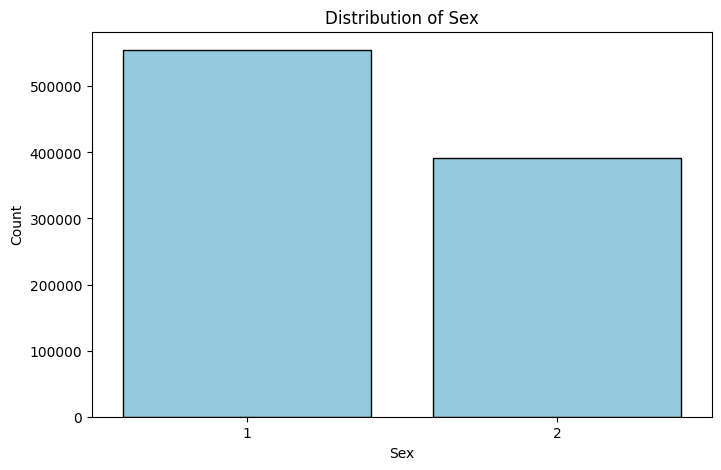

In [120]:
# Distribution of sex:
sex_counts = data['sex_atr'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=sex_counts.index, y=sex_counts.values, color = 'skyblue', edgecolor = 'black')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

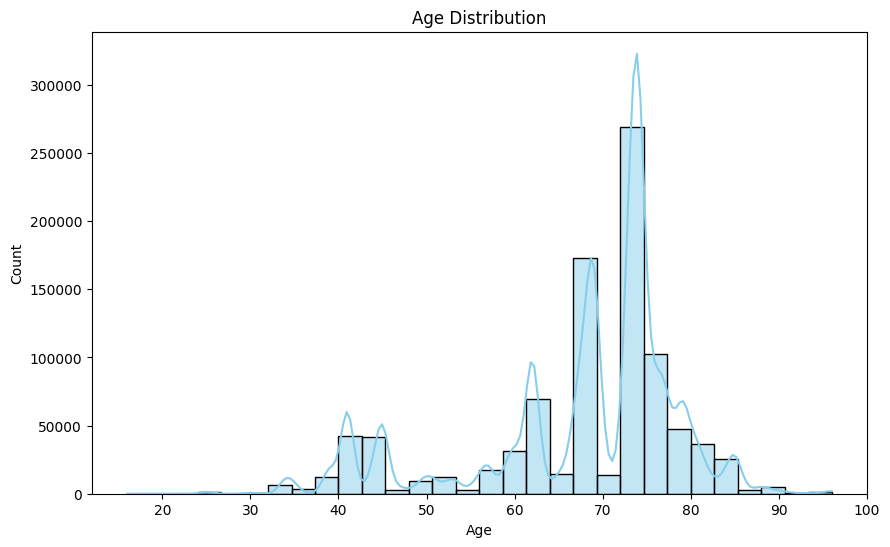

In [124]:
# Age distribution
# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True, color = 'skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

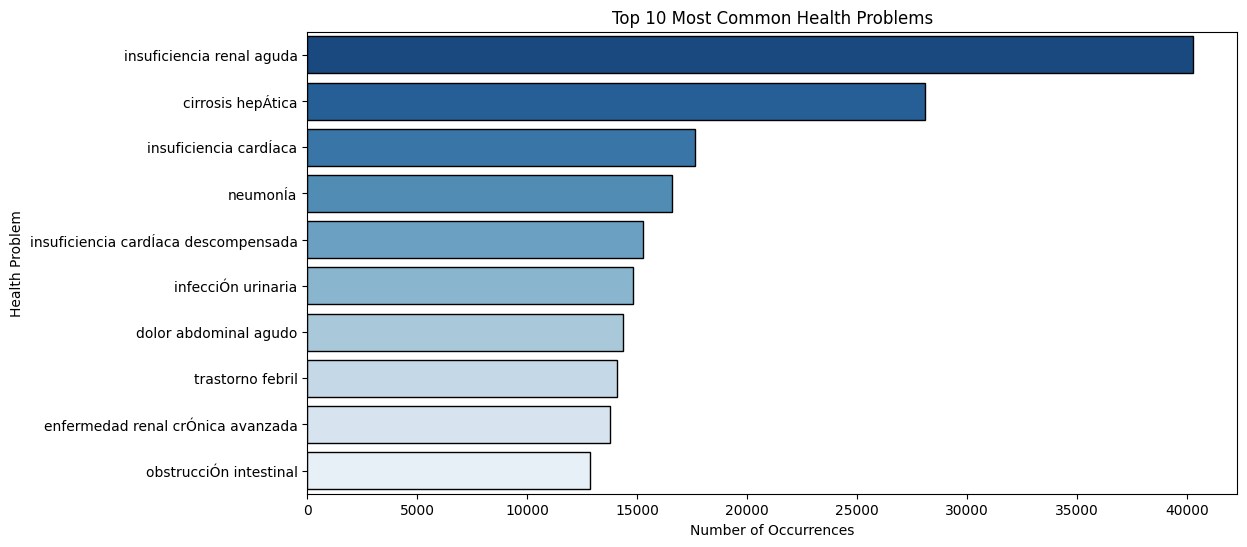

In [127]:
# Get the top 10 most common SNOMED descriptions
top_health_issues = data['snomed_descr'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_health_issues.values, y=top_health_issues.index, hue = top_health_issues.index, palette = 'Blues_r', edgecolor = 'black')

plt.title('Top 10 Most Common Health Problems')
plt.xlabel('Number of Occurrences')
plt.ylabel('Health Problem')
plt.show()

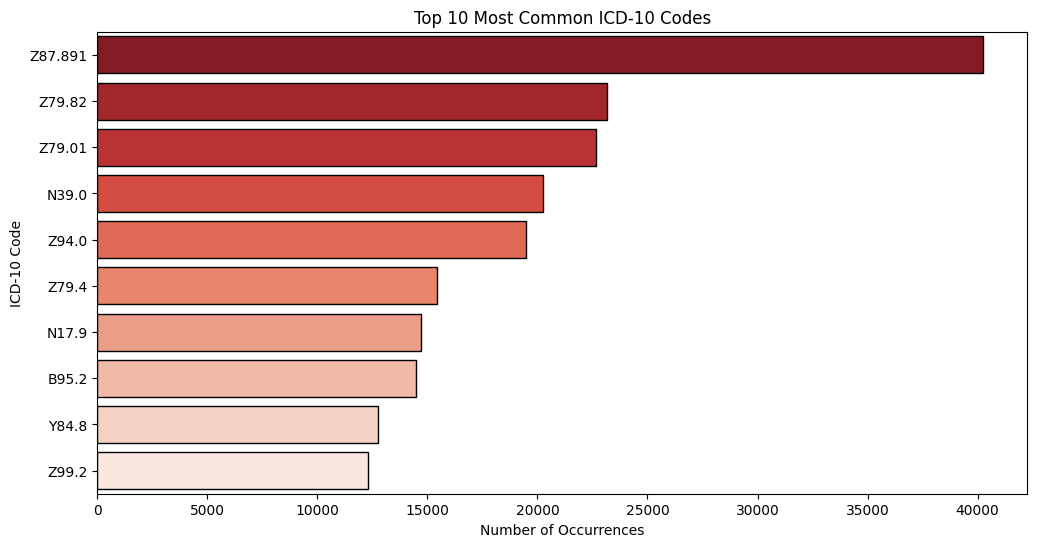

In [130]:
# Get the top 10 most common ICD-10 codes
top_icd10_code = data['icd10_code'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_icd10_code.values, y=top_icd10_code.index,  hue = top_health_issues.index, palette = 'Reds_r', edgecolor = 'black', legend = False)
plt.title('Top 10 Most Common ICD-10 Codes')
plt.xlabel('Number of Occurrences')
plt.ylabel('ICD-10 Code')
plt.show()

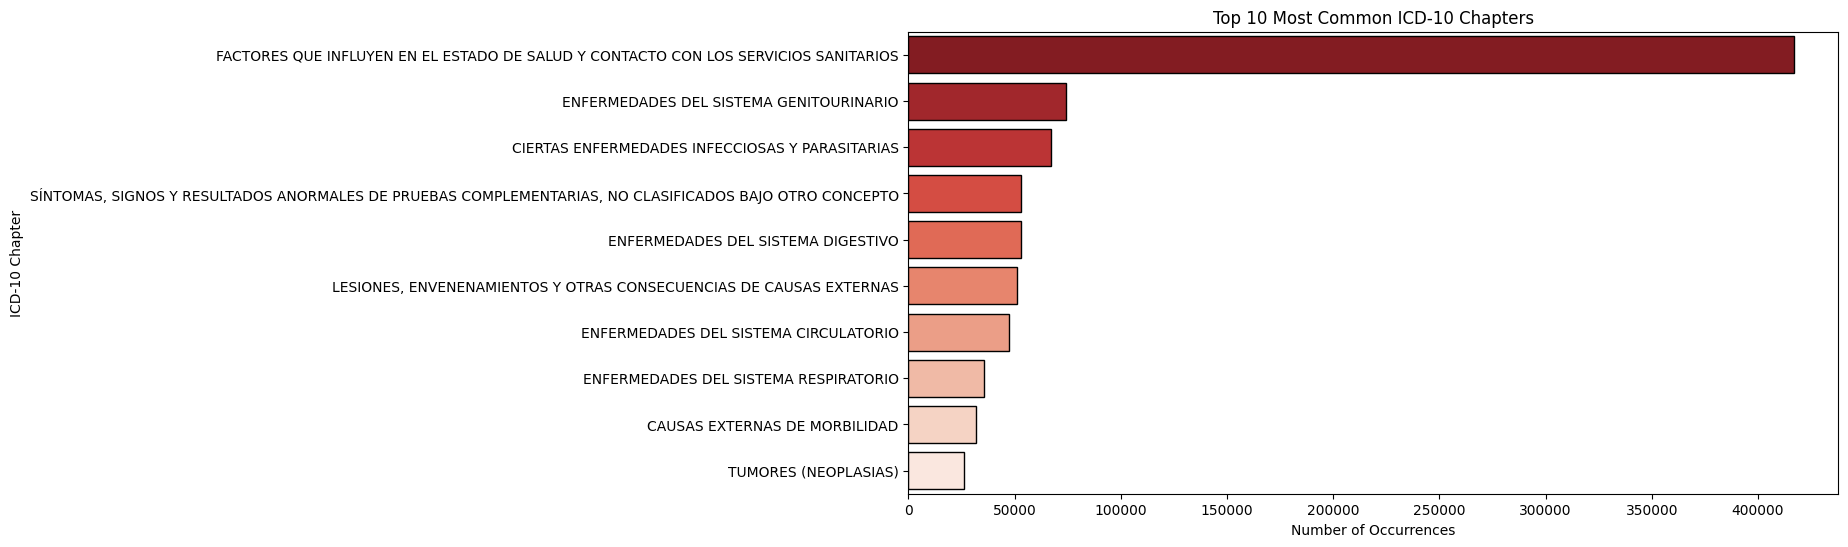

In [129]:
# Get the top 10 most common ICD-10 chapters
top_icd10 = data['icd10_capitulo'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_icd10.values, y=top_icd10.index,  hue = top_health_issues.index, palette = 'Reds_r', edgecolor = 'black', legend = False)
plt.title('Top 10 Most Common ICD-10 Chapters')
plt.xlabel('Number of Occurrences')
plt.ylabel('ICD-10 Chapter')
plt.show()

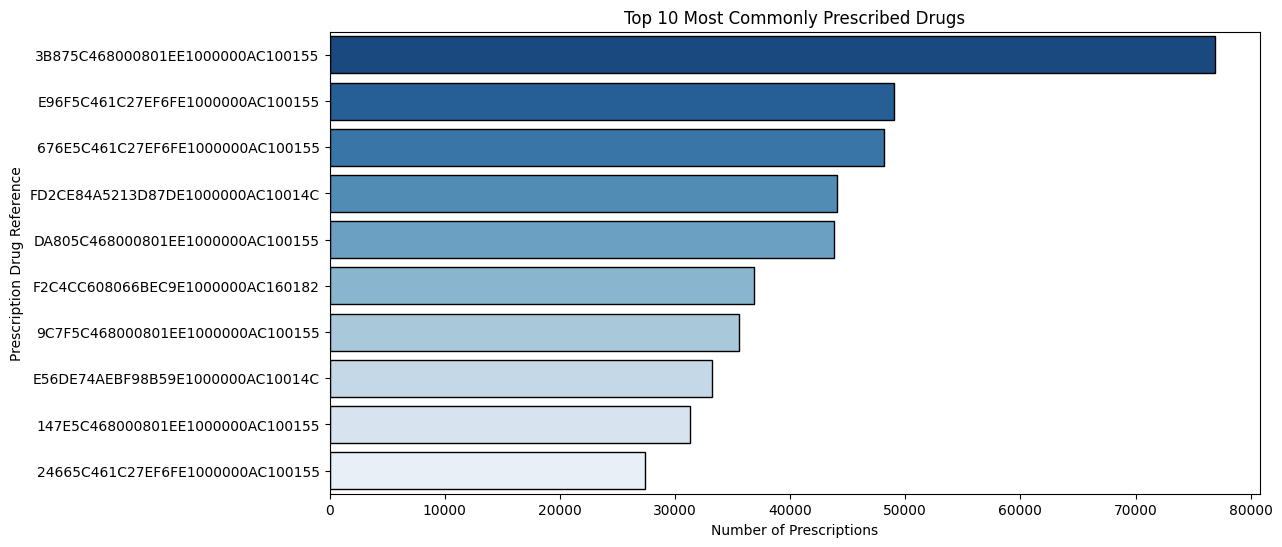

In [132]:
# Get the top 10 most commonly prescribed drugs
top_prescribed_drugs = data['prescription_drug_ref'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_prescribed_drugs.values, y=top_prescribed_drugs.index,hue = top_prescribed_drugs.index, palette = 'Blues_r', edgecolor = 'black')
plt.title('Top 10 Most Commonly Prescribed Drugs')
plt.xlabel('Number of Prescriptions')
plt.ylabel('Prescription Drug Reference')
plt.show()

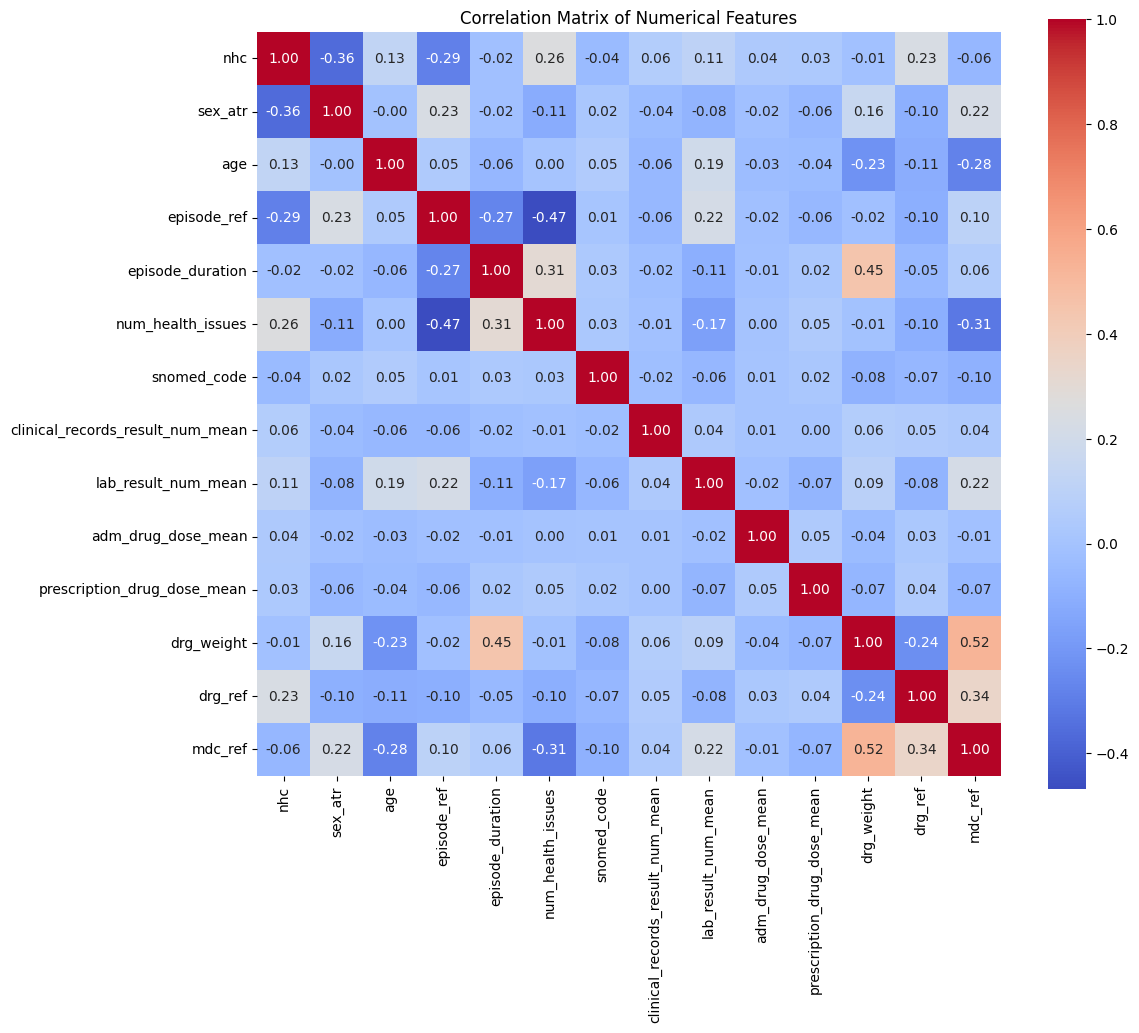

In [133]:
# Correlation Matriz
numerical_correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [137]:
# Find the most frequent SNOMED-to-ICD10 mappings
most_common_pairs = data.groupby(['snomed_code', 'icd10_code']).size().reset_index(name='count')
most_common_pairs = most_common_pairs.sort_values(by='count', ascending=False).head(10)
display(most_common_pairs)

,snomed_code,icd10_code,count
5719,7.231890e+08,Z87.891,1519
5733,7.231890e+08,Z94.0,1460
2999,1.887320e+08,N41.2,1455
5674,7.231890e+08,N39.0,1442
2454,9.186101e+07,N41.2,1400
5734,7.231890e+08,Z94.4,1159
5675,7.231890e+08,N99.0,1135
6073,2.147484e+09,Z94.0,1115
5677,7.231890e+08,N99.840,1106
2447,9.186101e+07,F05,1098


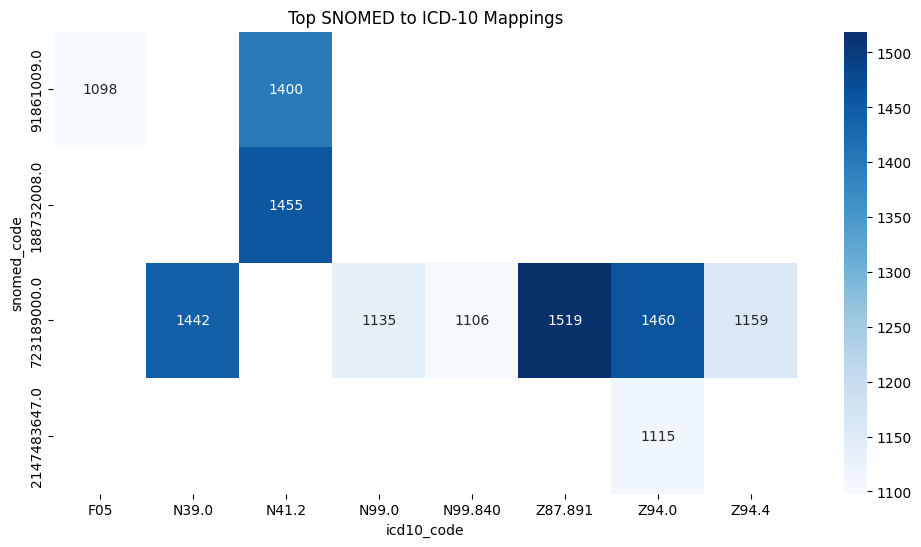

In [138]:
# Top SNOMED to ICD10 mapping
pivot = most_common_pairs.pivot(index='snomed_code', columns='icd10_code', values='count')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='g', cmap='Blues')
plt.title('Top SNOMED to ICD-10 Mappings')
plt.show()